In [2]:
%matplotlib inline
import numpy as np
from scipy.integrate import solve_ivp
from parametres import Paras
from utilities import *
from initialisation import *
from odes import odes_scale_size
import matplotlib.pyplot as plt
from size_scaled_func import *
import datetime as dt
from simulation_func import *
import pandas as pd
import pickle as pkl
import os
import seaborn as sns
import scipy.stats as stats

# Loading Data

- Load data from `Data` 

In [113]:
base_dir = '..\Data'
sample_number = 1
type = '\Asb'
t_type = '_t.npy'
Para_type ='_Para.pkl'
Rt_type = '_Rt.npy'
Ct_type = '_Ct.npy'
id_type = 'speciesID.npy'
file_name = f'\Abl_{sample_number}'

In [115]:
# start loading
repr_t = np.load(base_dir + type + file_name + file_name + t_type)
repr_Rt = np.load(base_dir + type + file_name + file_name + Rt_type)
repr_Ct = np.load(base_dir + type + file_name + file_name + Ct_type)
para = pkl.load(open(base_dir + type + file_name + file_name + Para_type, 'rb'))
# idx = np.load(base_dir + type + file_name + file_name + id_type)

# Visualise population trajectories

- Starts with absolute biomass
- Then Abundance

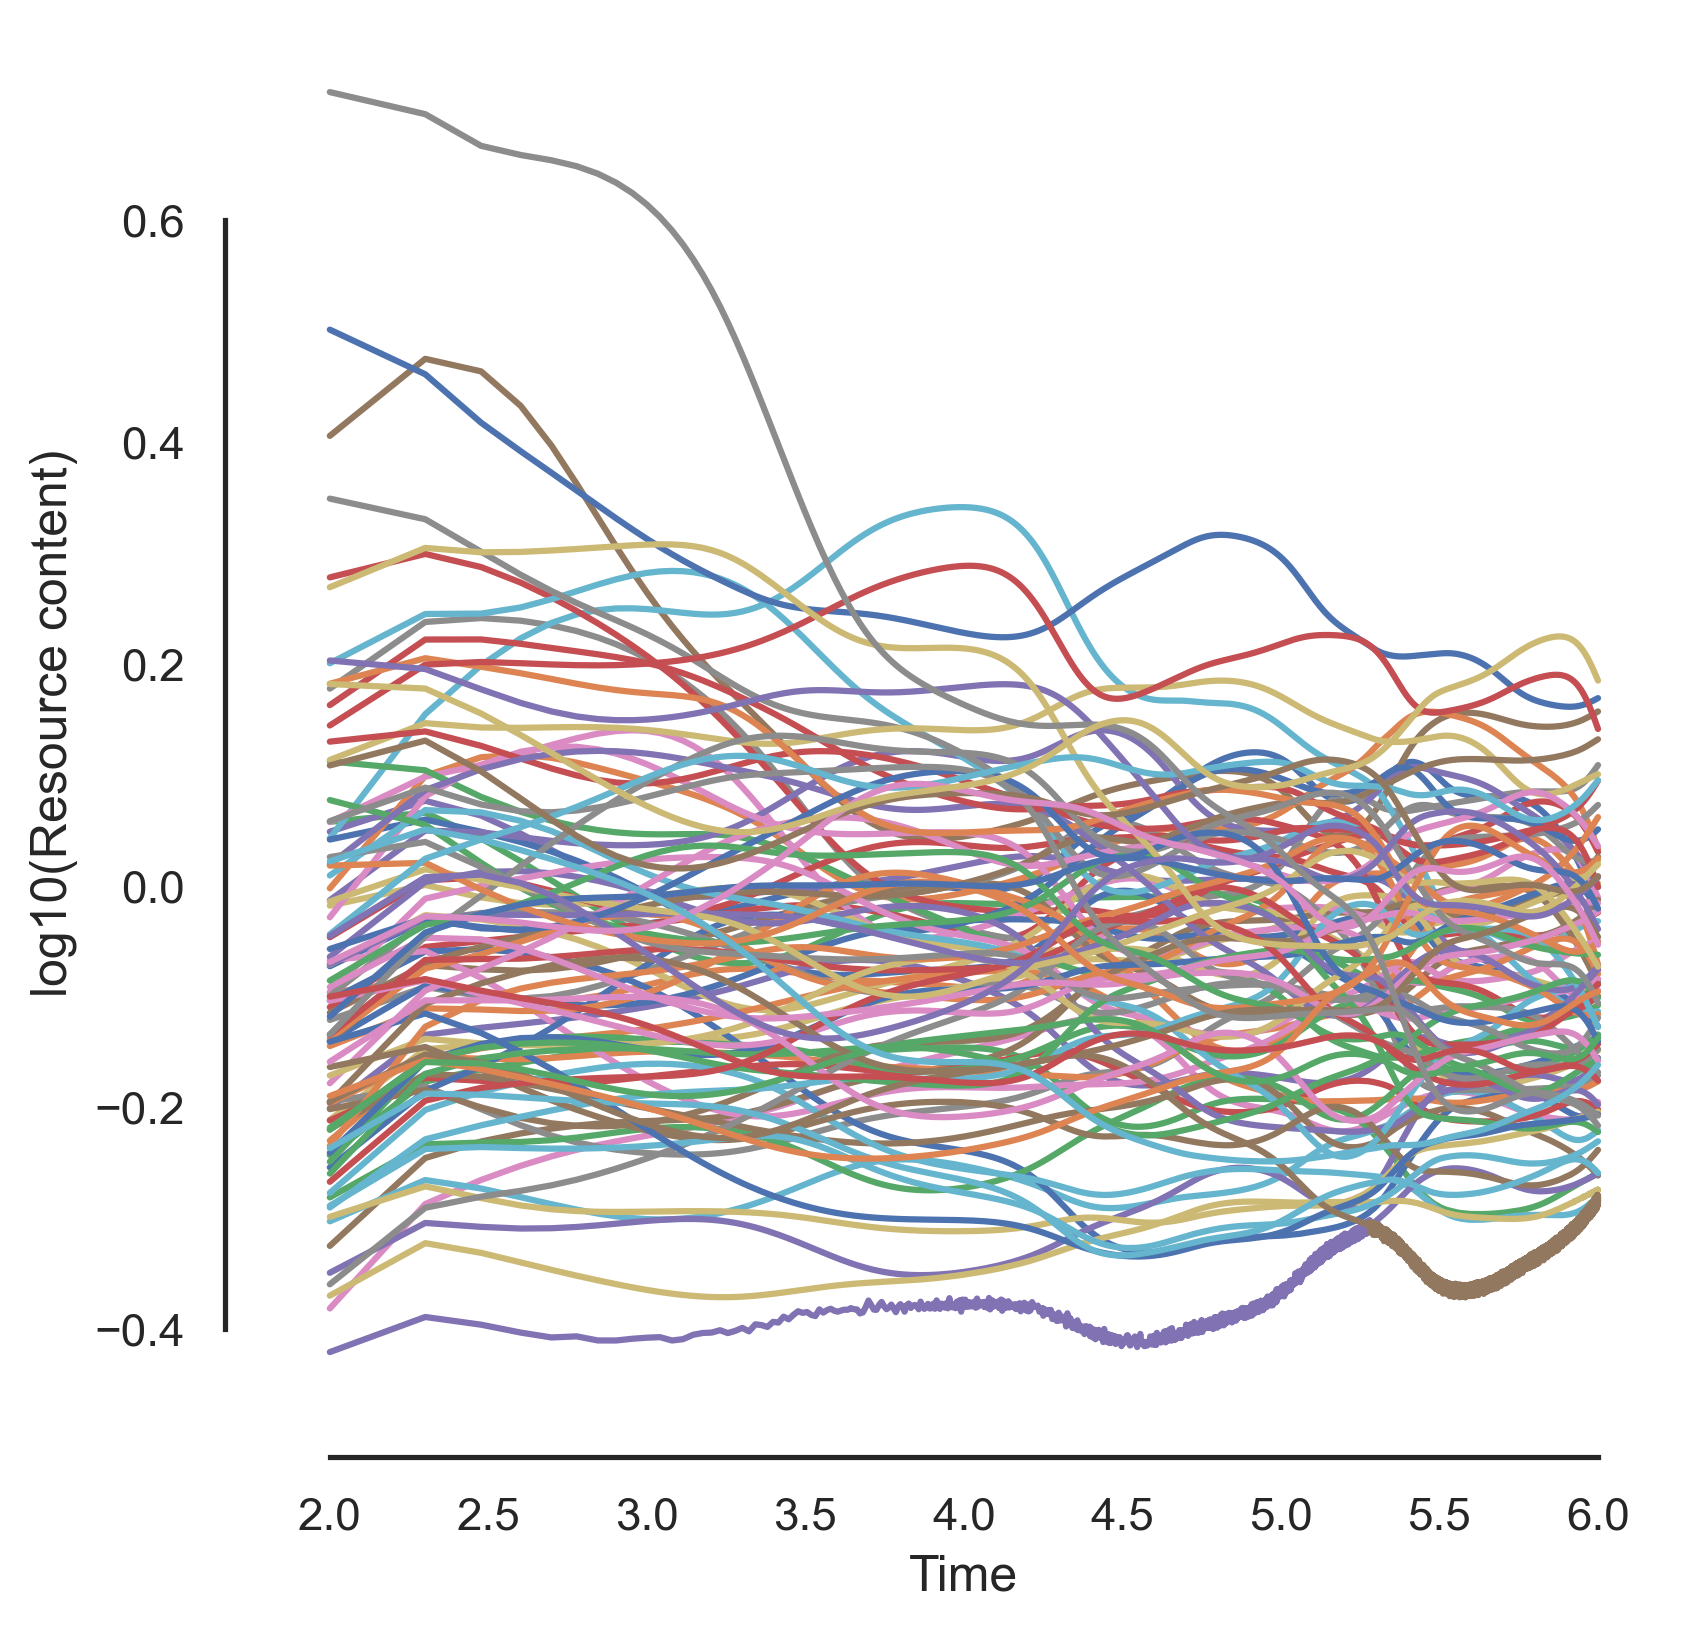

In [116]:
# plot species biomass trajectories
np.seterr(divide = 'ignore')
plt.figure(figsize=(6, 6), dpi=300)
for i in range(para.M):
    sns.lineplot(x=np.log10(repr_t), y=np.log10(repr_Rt[i, :]))
plt.xlabel('Time')
plt.ylabel('log10(Resource content)')
sns.despine(offset=10, trim=True)

In [117]:
avgm = para.avgm.reshape(para.avgm.shape[0])
avgm

array([1.40315757e+00, 1.18534077e-02, 1.68109200e+00, 4.58794274e+00,
       4.38161012e-02, 6.58433114e+00, 1.07654451e+01, 1.68452077e+02,
       2.05362657e-02, 2.76884217e+00, 2.66568536e-02, 4.00278159e+01,
       4.16116385e-01, 2.16158578e-01, 1.76546784e-02, 5.18794623e-02,
       4.96316524e+01, 4.33665994e-02, 2.08555723e+01, 5.97541242e-01,
       9.51149971e+00, 5.71487513e-02, 1.97939119e-01, 5.42430672e+01,
       8.31450042e+00, 5.32824235e-01, 7.81318874e-02, 2.16312584e-01,
       1.67561488e+00, 4.18570994e-01, 4.94320258e-01, 7.78855990e-01,
       1.11624569e-01, 1.11701008e+01, 7.22079241e+00, 8.79486487e+01,
       2.02064412e-01, 2.72266418e-02, 1.49583188e-01, 1.30076209e+00,
       4.18740785e+00, 3.14153247e+01, 7.85638800e-02, 8.95415488e-02,
       2.73136908e+00, 2.04742416e+02, 2.51262597e-01, 1.25388728e-01,
       1.69037911e+02, 9.19312104e+01, 2.89545748e+01, 1.12063214e-01,
       5.79385407e+00, 2.51396171e-02, 3.63904126e-02, 1.65224424e-01,
      

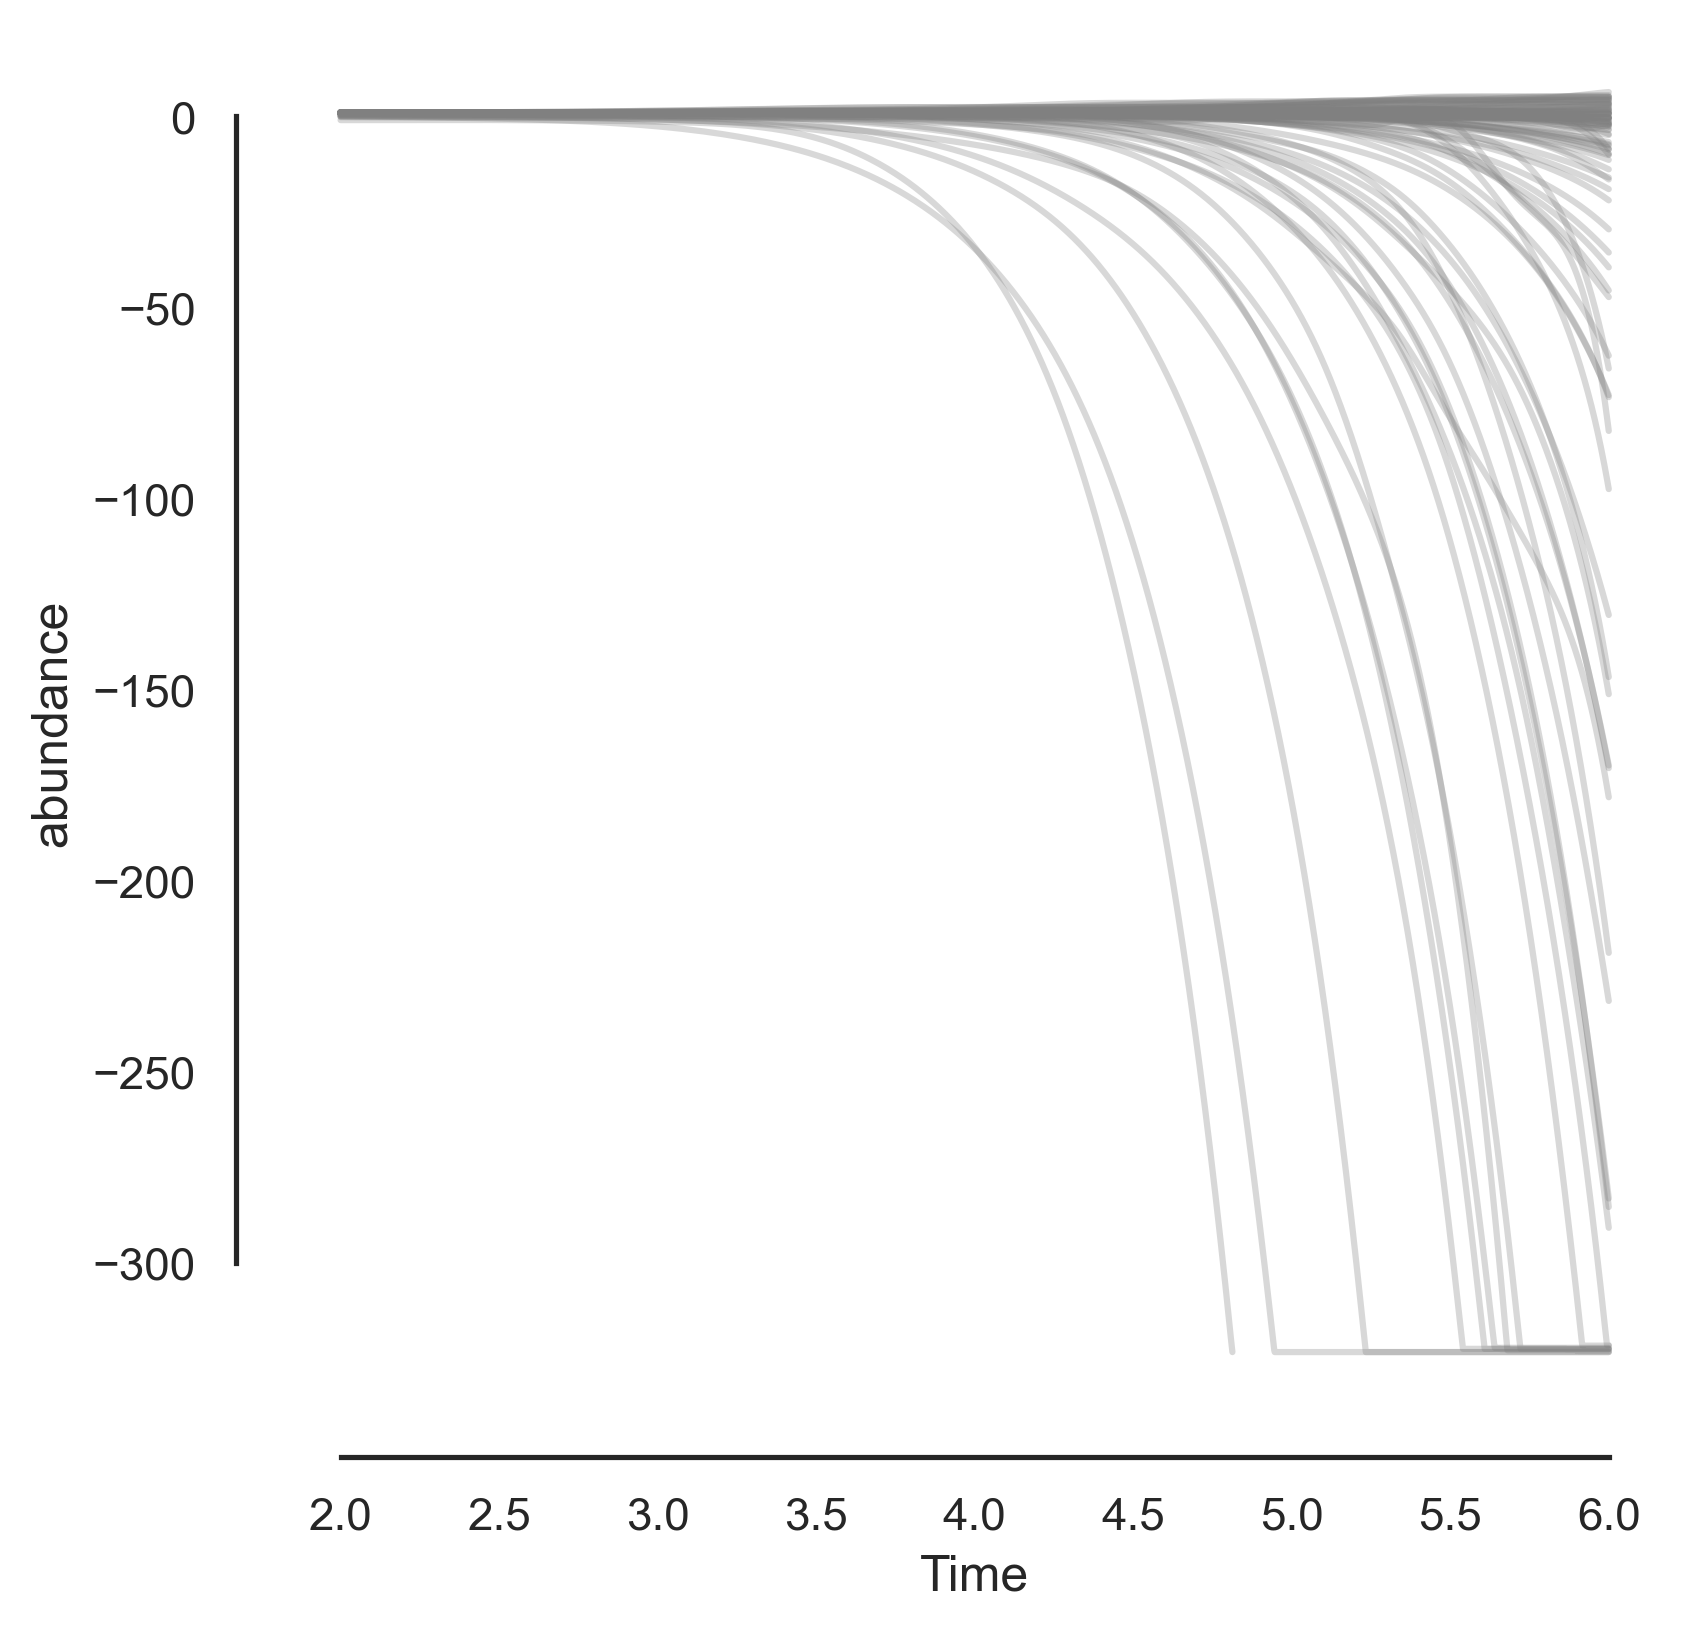

In [118]:
# get average mass
avgm = para.avgm.reshape(para.avgm.shape[0])
for j in range(len(repr_Ct[1, :])):
    repr_Ct[:, j] = repr_Ct[:, j]/avgm
# plot species biomass trajectories
np.seterr(divide = 'ignore')
plt.figure(figsize=(6, 6), dpi=300)
for i in range(para.N):
    sns.lineplot(x=np.log10(repr_t), y=np.log10(repr_Ct[i, :]), color='grey', alpha=0.3)
plt.xlabel('Time')
plt.ylabel('abundance')
sns.despine(offset=10, trim=True)

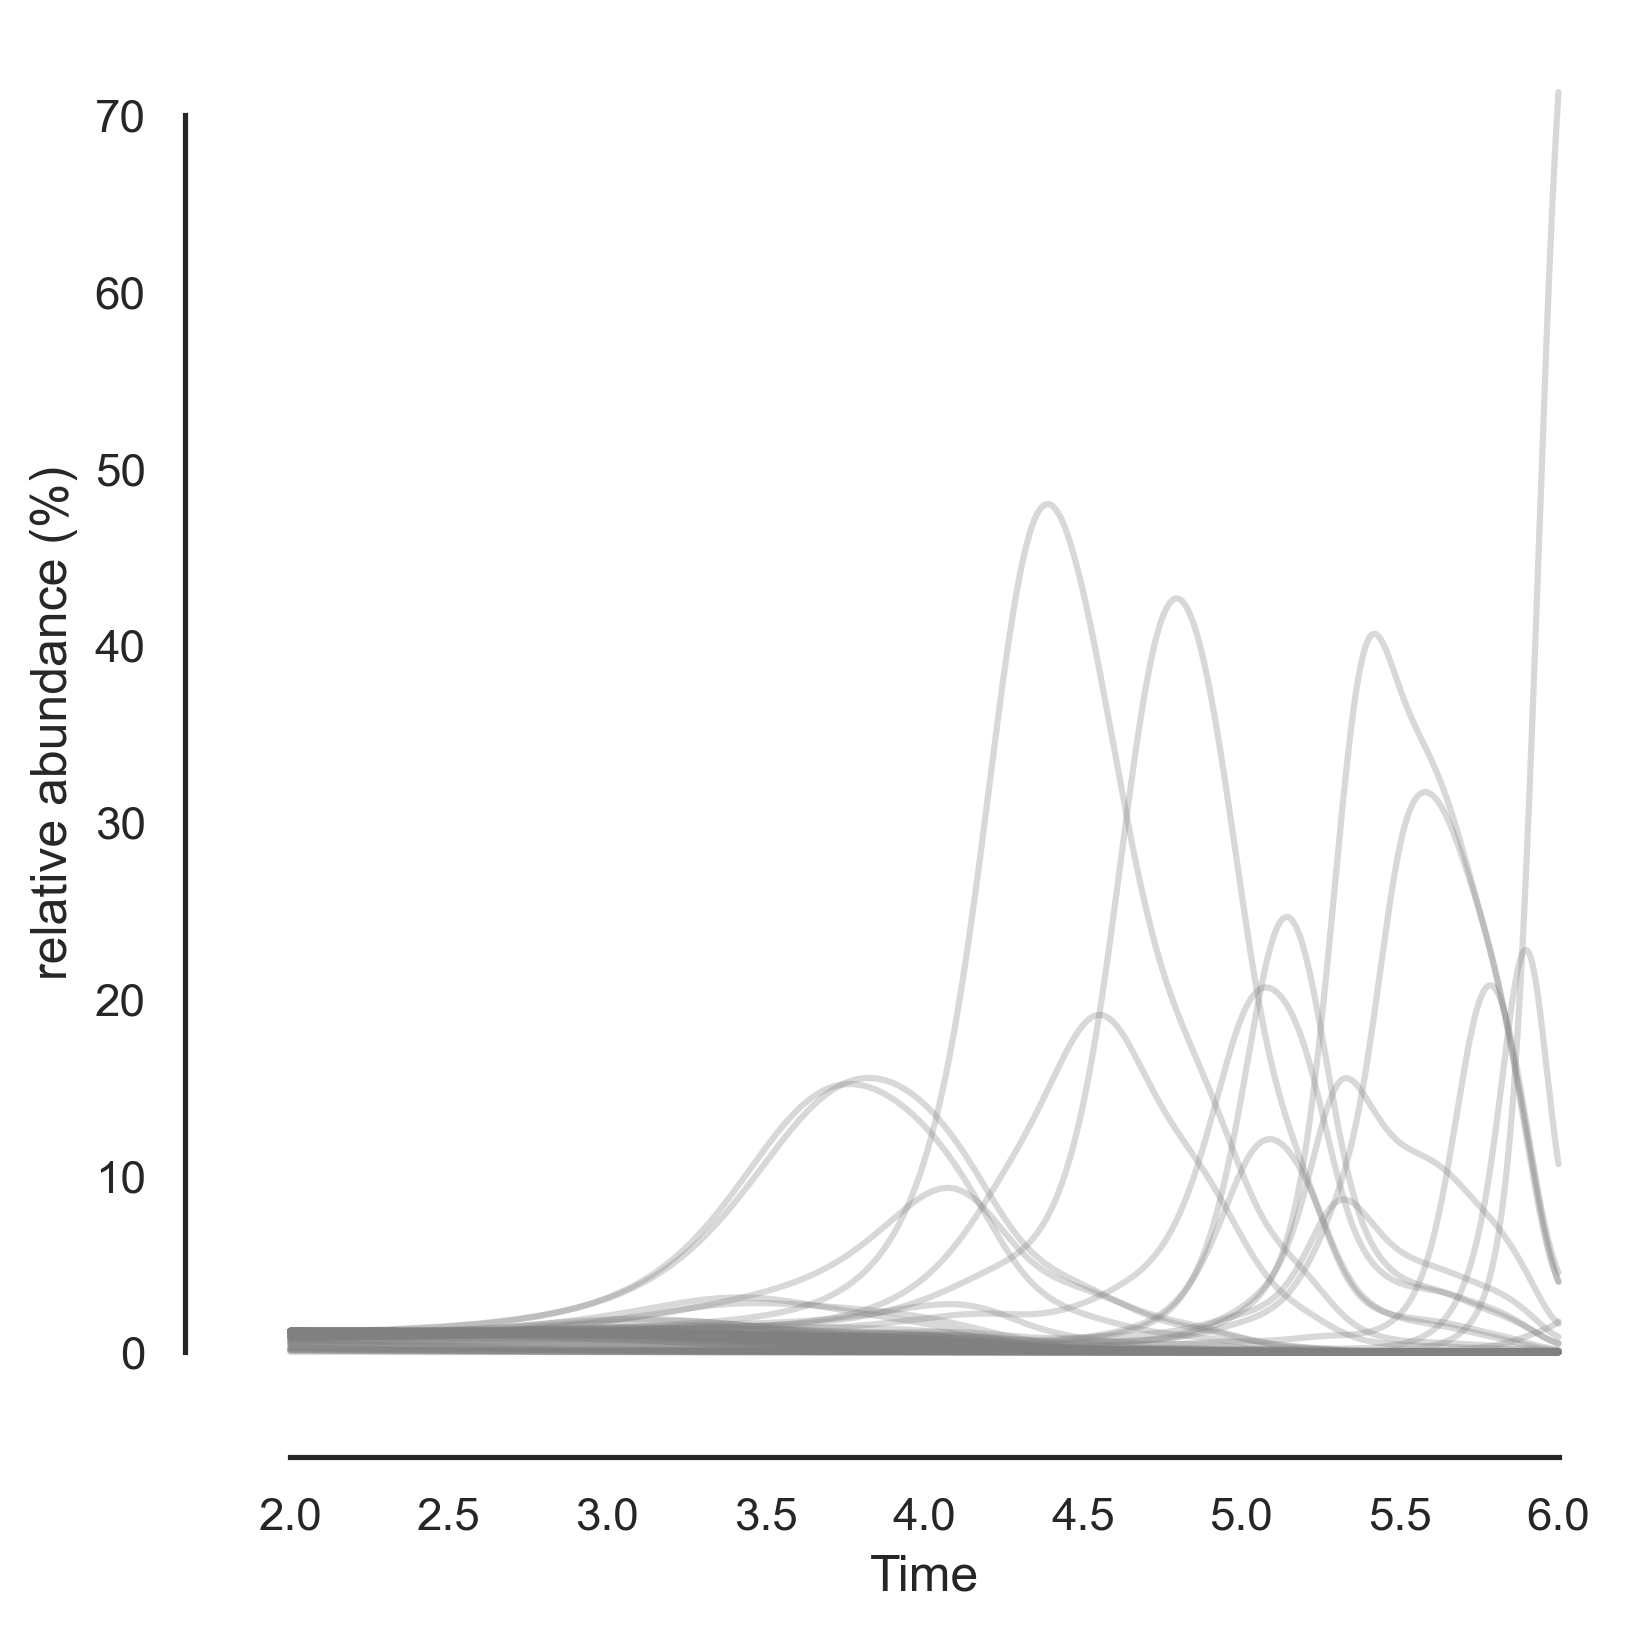

In [119]:
# plot species abudance trajectories
np.seterr(divide = 'ignore')
plt.figure(figsize=(6, 6), dpi=300)
for i in range(para.N):
    sns.lineplot(x=np.log10(repr_t), y=relative_abundance(repr_Ct)[i, :]*100,color='grey', alpha=0.3)
plt.xlabel('Time')
plt.ylabel('relative abundance (%)')
sns.despine(offset=10, trim=True)

In [122]:
repr_Ct.shape

(100, 10000)

In [120]:
logmass = np.log10(avgm)

In [121]:
logmass

array([ 0.14710644, -1.92615678,  0.22559148,  0.66161799, -1.35836627,
        0.81851166,  1.03203199,  2.22647637, -1.68747853,  0.4422982 ,
       -1.57419111,  1.60236189, -0.38078518, -0.66522753, -1.75314019,
       -1.28500453,  1.69575873, -1.36284463,  1.31922211, -0.22363211,
        0.978249  , -1.24299325, -0.70346837,  1.73434424,  0.91983616,
       -0.27341603, -1.10717168, -0.66491821,  0.22417421, -0.37823087,
       -0.30599159, -0.10854284, -0.95224021,  1.04805709,  0.85858486,
        1.94422917, -0.69451017, -1.56500592, -0.82511721,  0.11419787,
        0.62194526,  1.49714155, -1.10477708, -1.0479754 ,  0.43638039,
        2.31120782, -0.59987216, -0.9017415 ,  2.22798412,  1.96346298,
        1.46171719, -0.95053693,  0.76296755, -1.59964134, -1.43901302,
       -0.78192575, -1.06112245, -1.18174253,  1.07043418, -1.52631421,
        1.42568306, -1.78939453,  1.05510217, -1.30786569,  1.31785191,
       -1.22176186,  1.85302431,  1.3613899 , -0.14800665, -0.36

In [123]:
data_final= []
data_initial = []
for i in range(len(repr_Ct[:, 1])):
    freqf = round(repr_Ct[i, -1], None)
    freqi = round(repr_Ct[i, 0], None)
    data_final.append([logmass[i]]*freqf)
    data_initial.append([logmass[i]*freqi])

from functools import reduce
data_final = reduce(lambda x,y: x+y, data_final)
data_initial = reduce(lambda x,y: x+y, data_initial)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


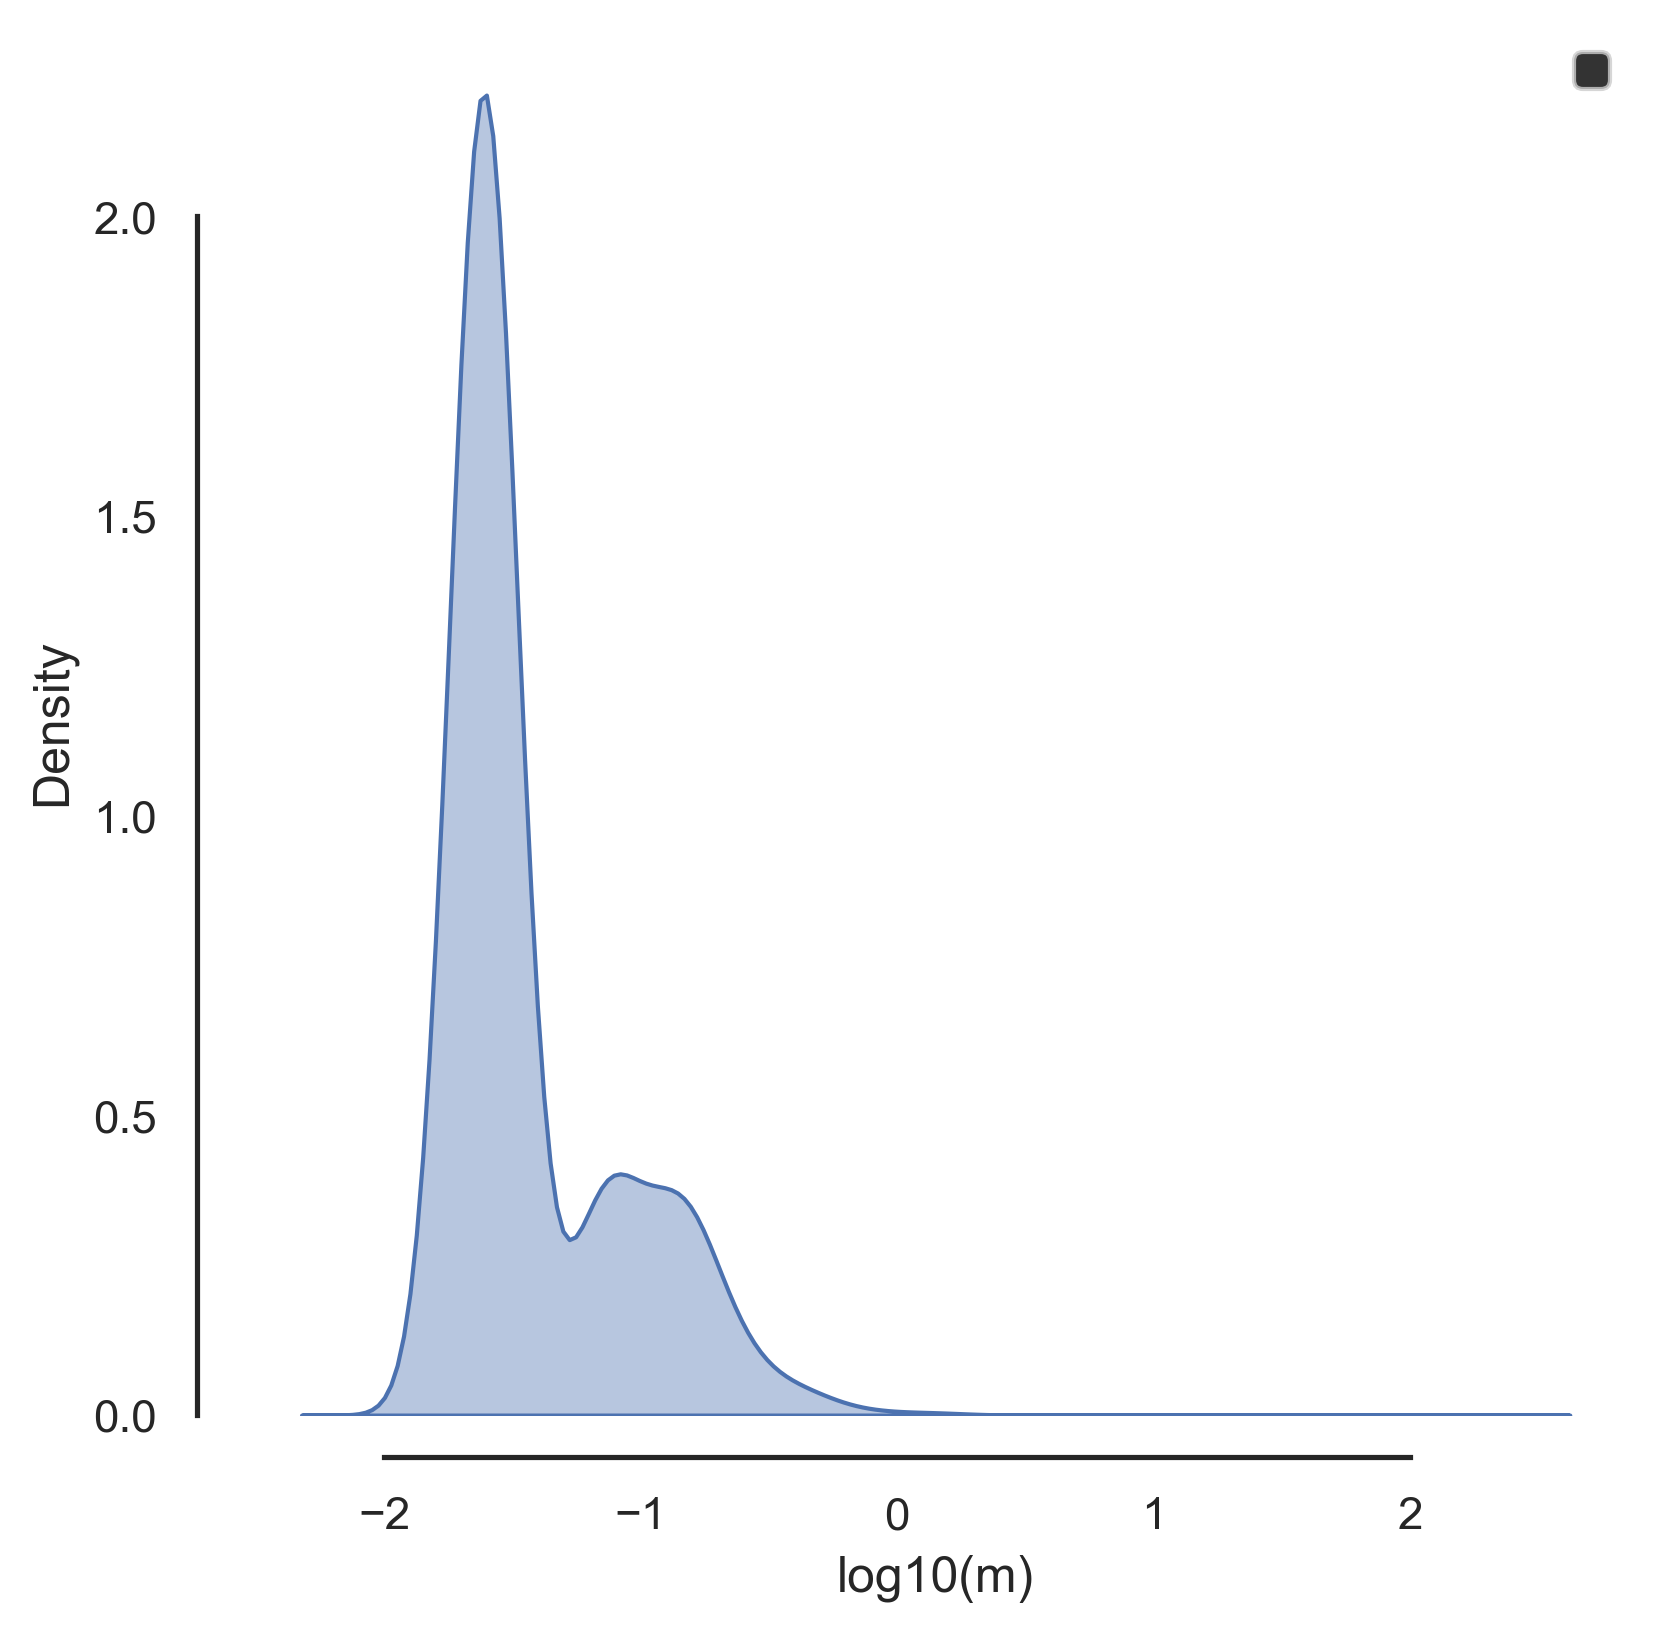

In [124]:
# Species abundance distirbution (SAD) 
# quantify the variation of abundance across species in a community

plt.figure(figsize=(6, 6), dpi=300)
sns.kdeplot(data_final, fill='red', alpha=0.4, bw_adjust=8)
# sns.kdeplot(data_initial, fill='grey', alpha=0.4)
plt.legend()
plt.xlabel('log10(m)')
plt.xticks(rotation=45)
sns.despine(offset=10, trim=True)

# Abundance fluctuation distribution AFD and mean abundance distirbution

- Load assembly data
- store in a list `Ct_abl` where each element is a `np.array`

In [105]:
base_dir = '..\Data'
sample_number = 1
type = '\sub'
t_type = '_t.npy'
Para_type ='_Para.pkl'
Rt_type = '_Rt.npy'
Ct_type = '_Ct.npy'
file_name = f'\sAbl_{sample_number}'

In [106]:
para = pkl.load(open(base_dir + type + file_name + file_name + Para_type, 'rb'))
Ct_abl = np.empty((para.N, 30))
# load data
for i in range(1, 31):
    # define file path
    file_name = f'\sAbl_{i}' 
    Ct_abl[:, i-1] = np.load(base_dir + type + file_name + file_name + Ct_type)[:, -1]

In [107]:
Ct_abl.shape

(30, 30)

- Next we plot AFD for each species
- first, reorganised data into `pd.Dataframe`
- then use `facetgrid` to visualised

In [103]:
vals = Ct_abl.flatten()
speclist = np.array([[f'species {i}']*30 for i in range(1, 51)]).flatten()
tardf = pd.DataFrame({'Biomass': vals, 'Species': speclist})
tardf['Biomass'] = np.log10(tardf['Biomass'])

ValueError: All arrays must be of the same length

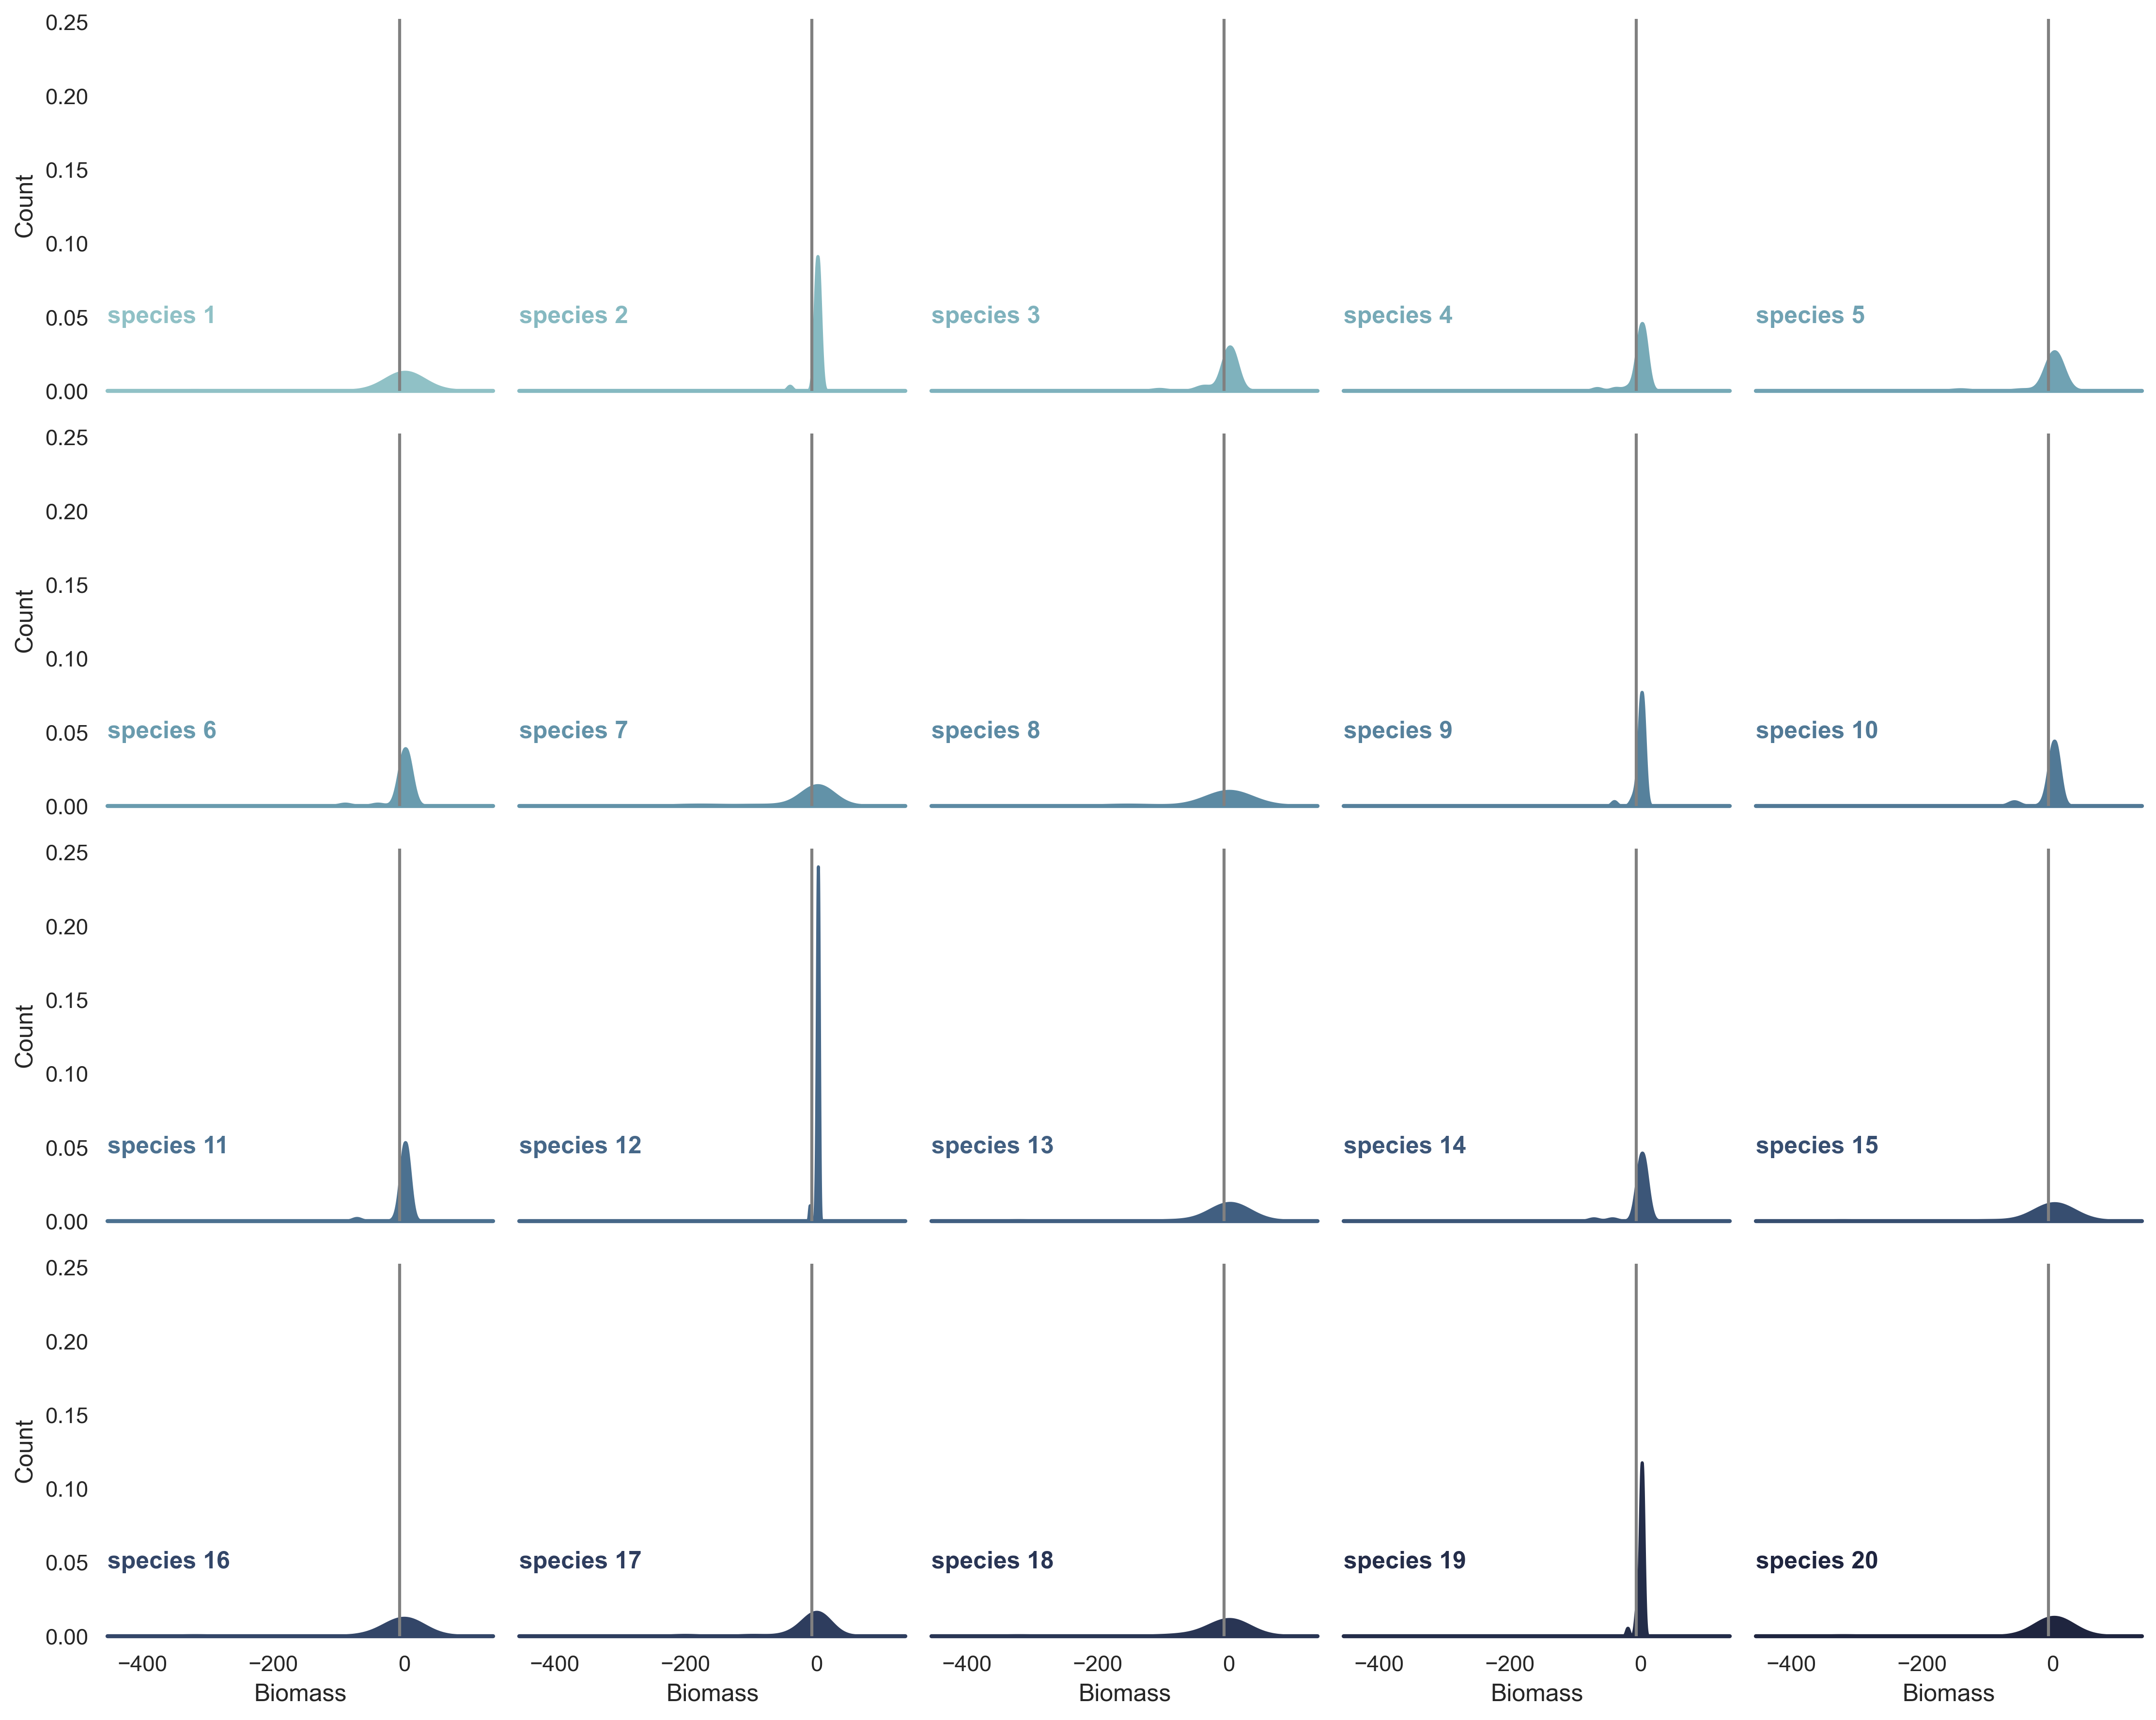

In [45]:

sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0), 'figure.figsize':(6, 6), 'figure.dpi':300})
pal = sns.cubehelix_palette(20, rot=-.25, light=.7)
g = sns.FacetGrid(tardf, col='Species', col_wrap=5, hue='Species', palette=pal, sharex=True, sharey=True)
g.map(sns.kdeplot, "Biomass",
      bw_adjust=1, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)
g.refline(x=tardf['Biomass'].mean(), linestyle='-', color='grey')
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)

g.map(label, "Biomass")
g.set_titles("")
g.set(ylabel="Count")
g.despine(bottom=True, left=True)
g.tight_layout()

In [16]:
base_dir = '..\Data'
sample_number = 1
type = '\-25_beta'
t_type = '_t.npy'
Para_type ='_Para.pkl'
Rt_type = '_Rt.npy'
Ct_type = '_Ct.npy'
file_name = f'\Abl_{sample_number}'

In [17]:
# start loading
repr_t = np.load(base_dir + type + file_name + file_name + t_type)
repr_Rt = np.load(base_dir + type + file_name + file_name + Rt_type)
repr_Ct = np.load(base_dir + type + file_name + file_name + Ct_type)
para = pkl.load(open(base_dir + type + file_name + file_name + Para_type, 'rb'))

FileNotFoundError: [Errno 2] No such file or directory: '..\\Data\\-25_beta\\Abl_1\\Abl_1_t.npy'

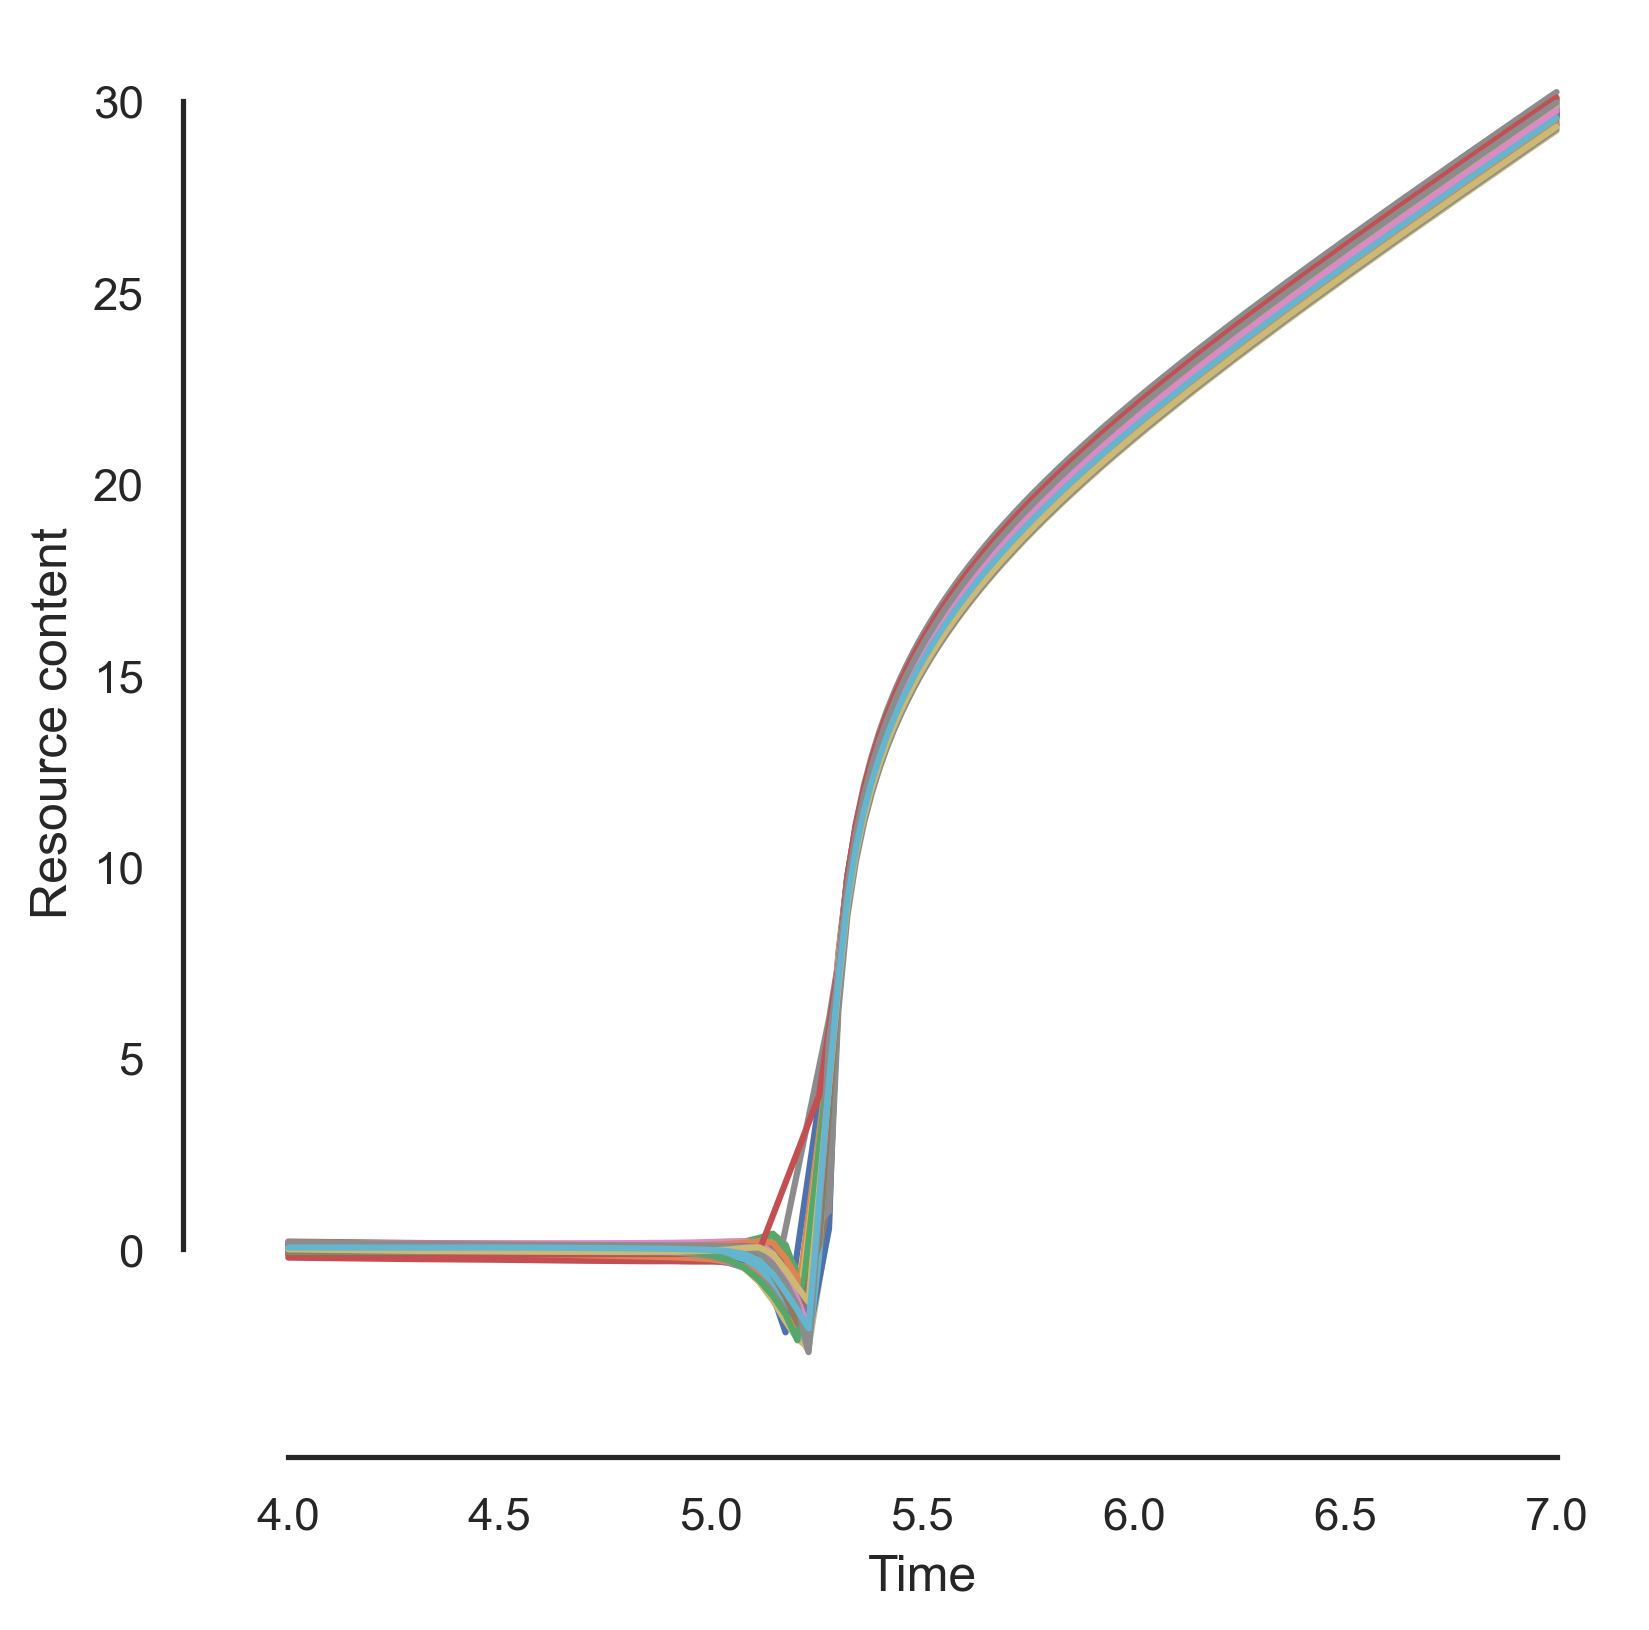

In [ ]:
np.seterr(divide = 'ignore', invalid='ignore')

plt.figure(figsize=(6, 6), dpi=300)
for i in range(para.M):
    sns.lineplot(x=np.log10(repr_t), y= np.log10(repr_Rt[i, :]))
plt.xlabel('Time')
plt.ylabel('Resource content')
sns.despine(offset=10, trim=True)

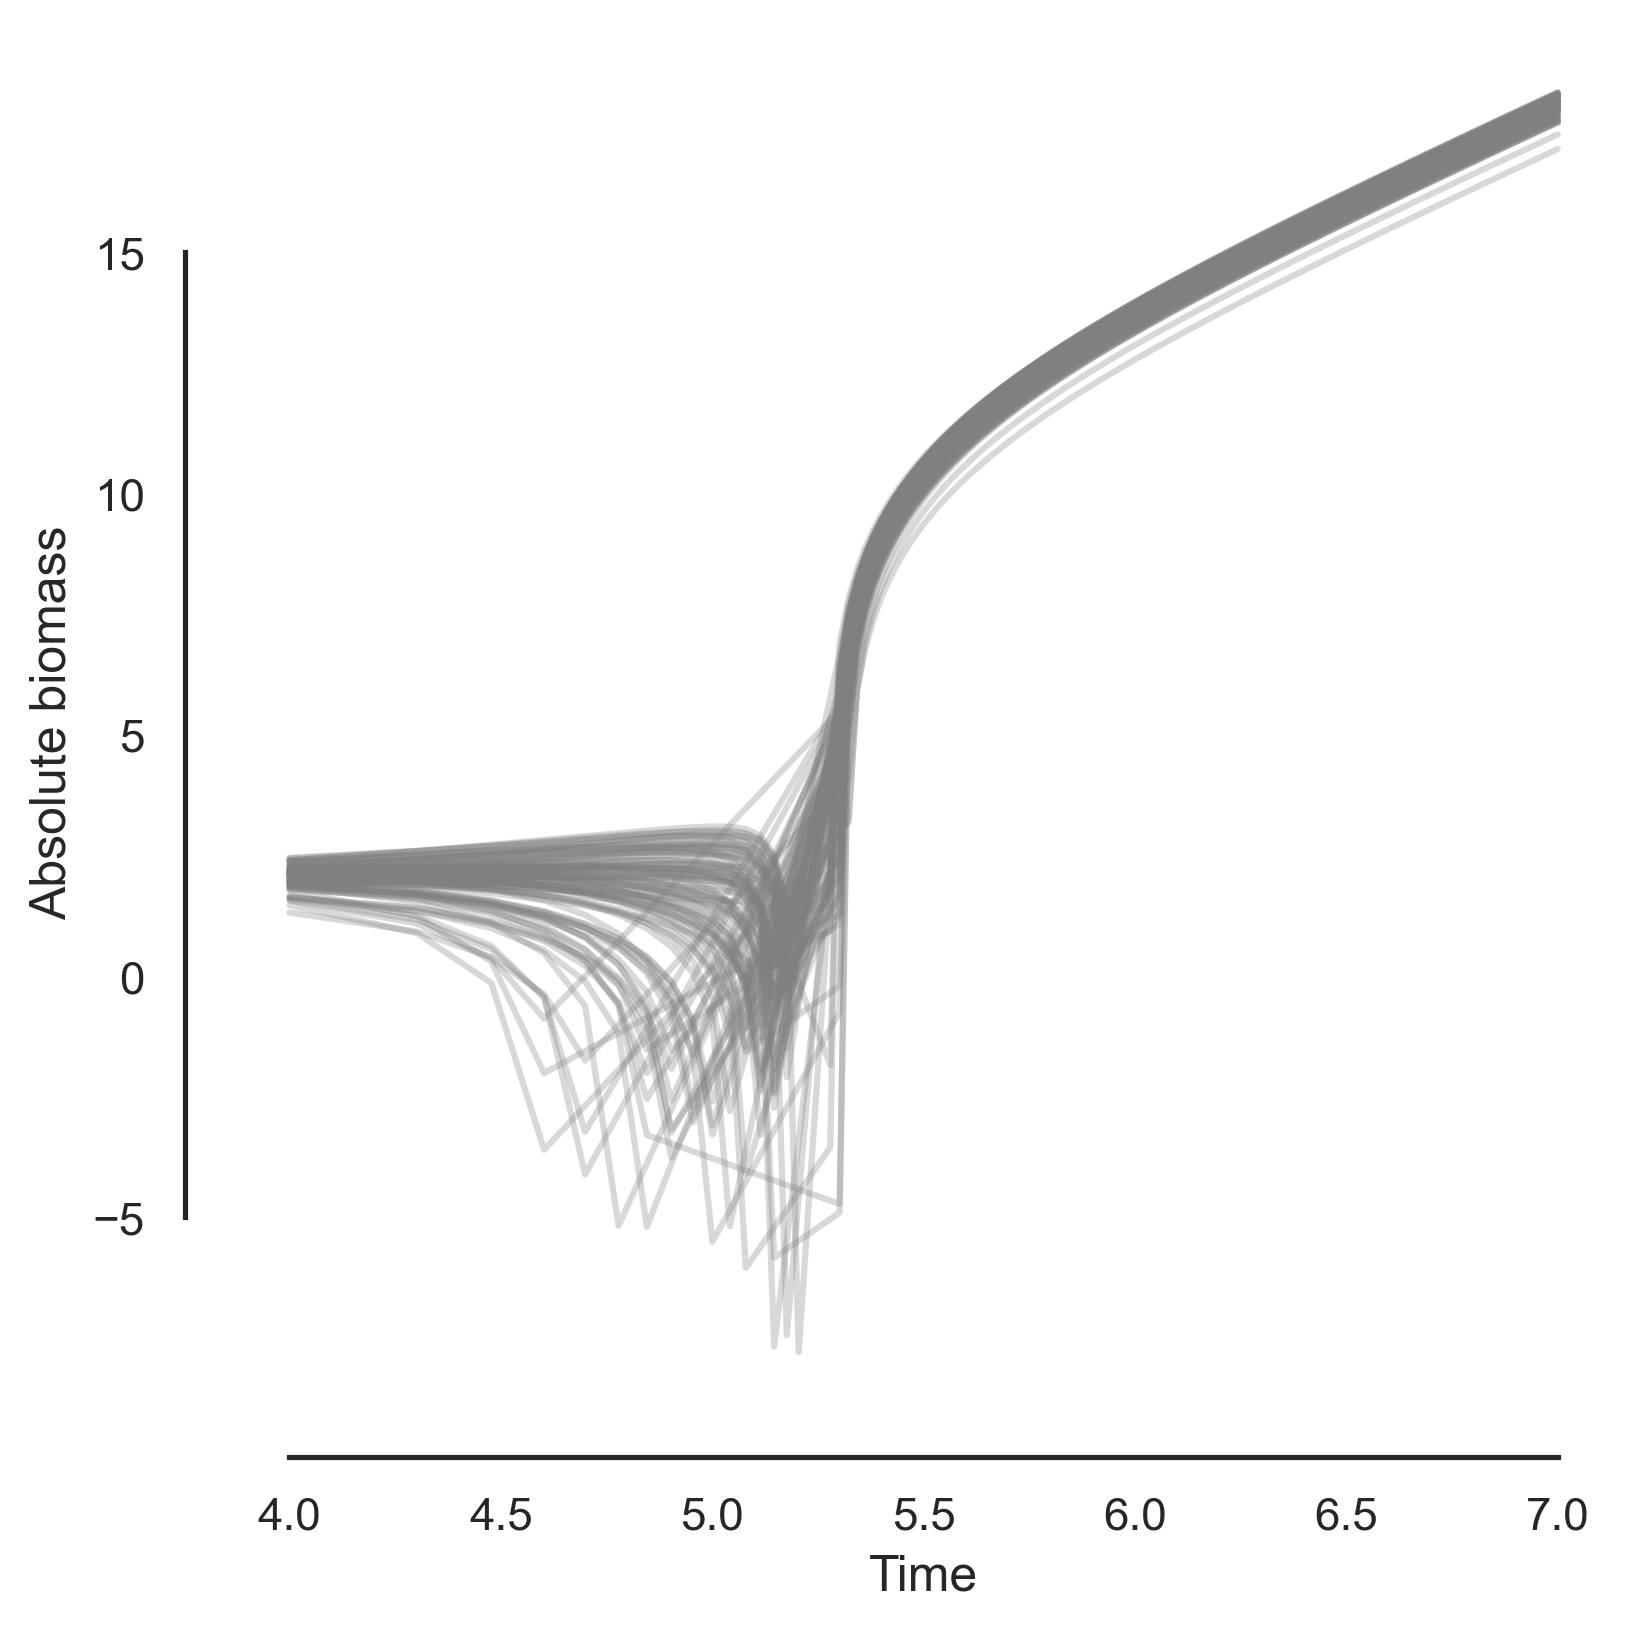

In [ ]:
np.seterr(divide = 'ignore', invalid='ignore')
plt.figure(figsize=(6, 6), dpi=300)
for i in range(para.N):
    sns.lineplot(x=np.log10(repr_t), y=np.log10(repr_Ct[i, :]), color='grey', alpha=0.3)
plt.xlabel('Time')
plt.ylabel('Absolute biomass')
sns.despine(offset=10, trim=True)

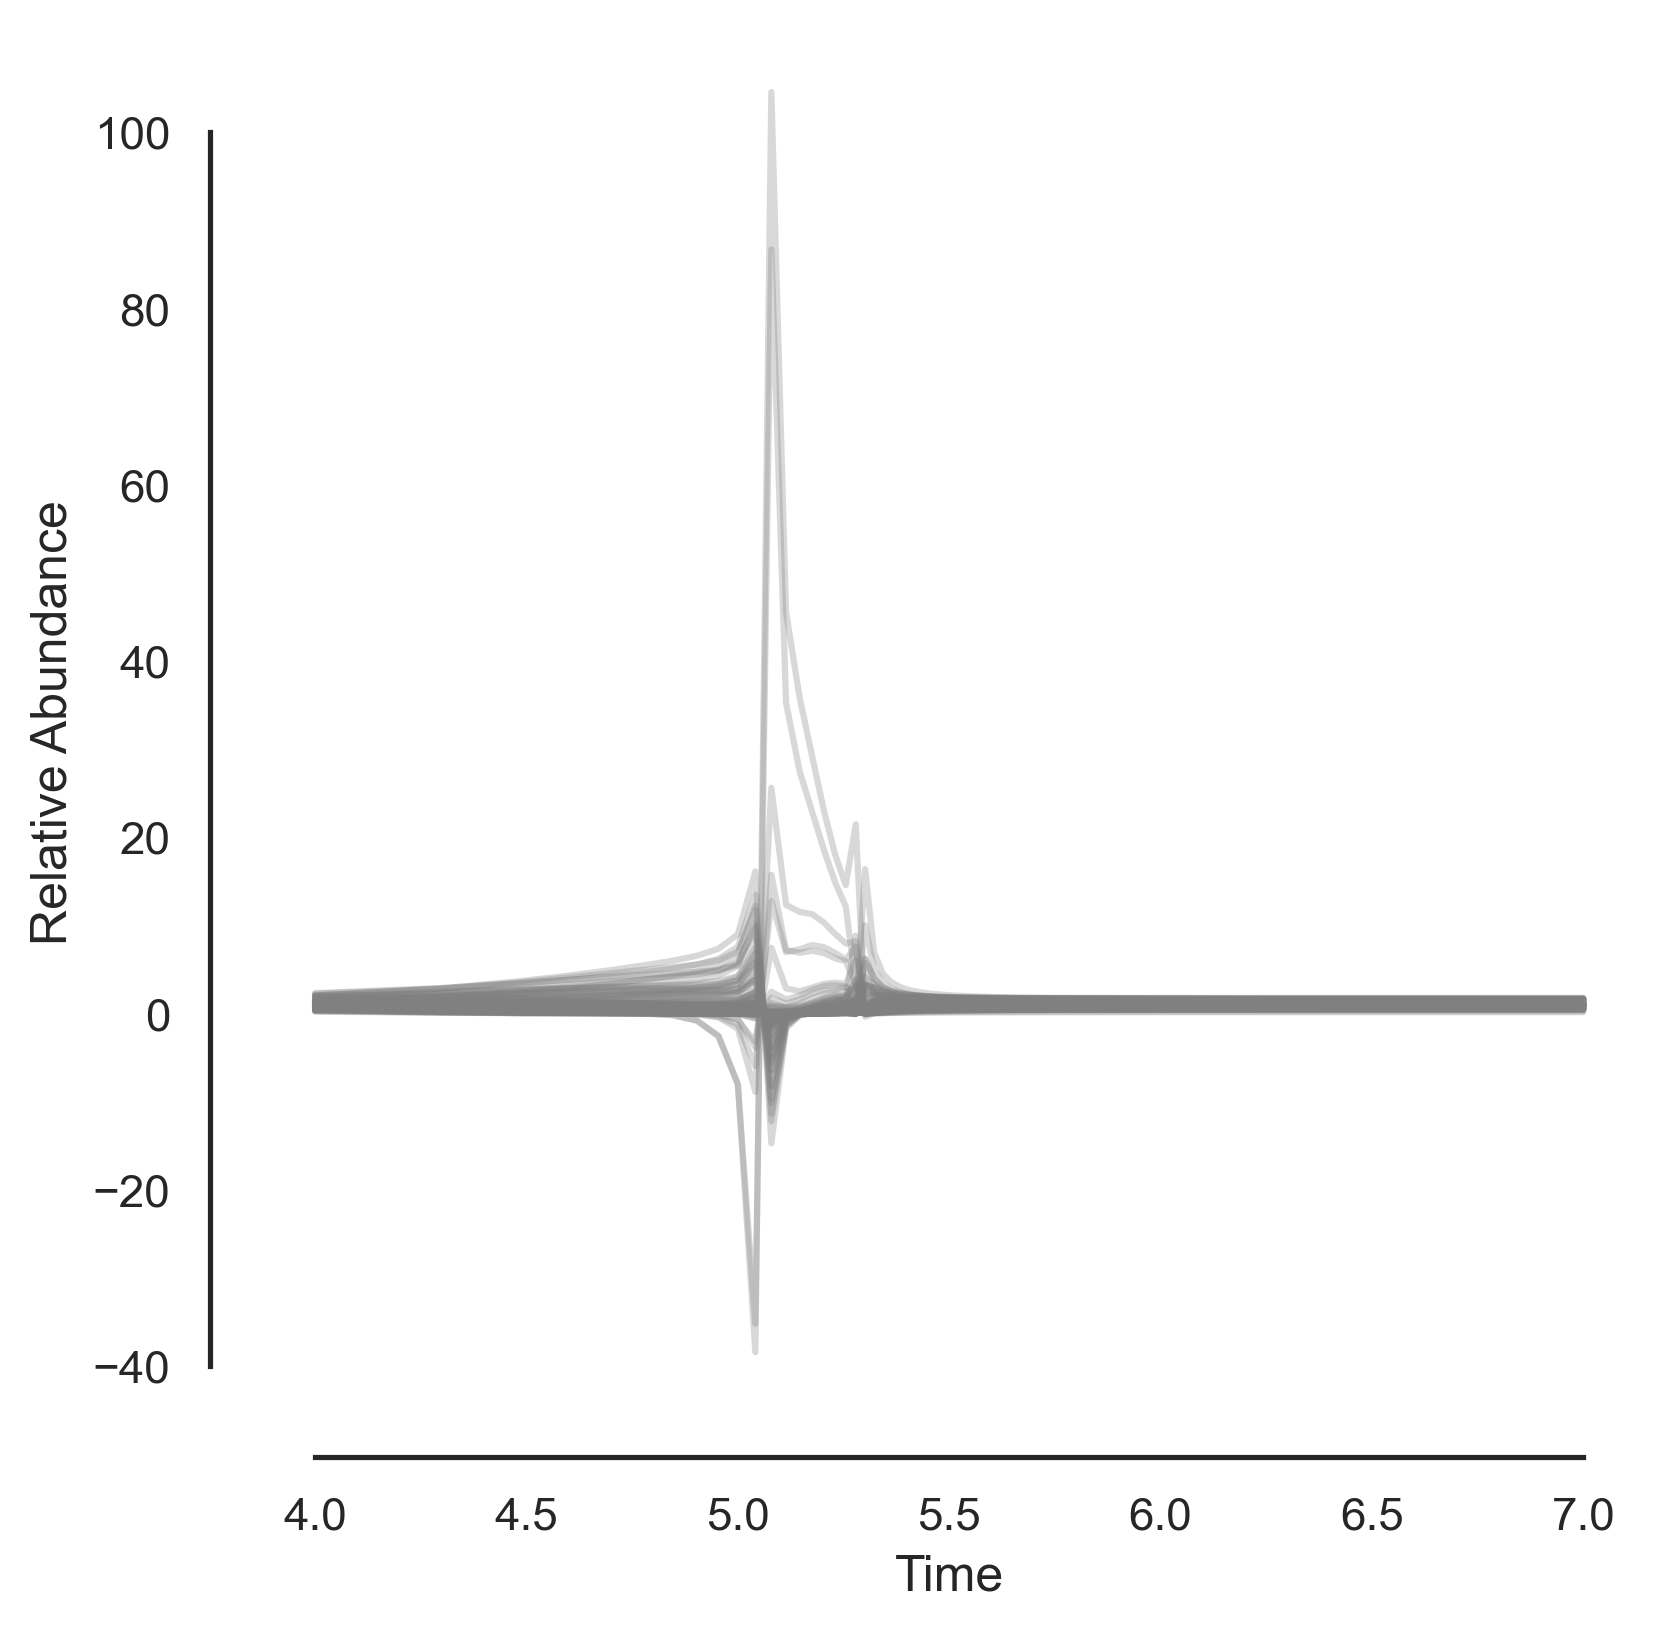

In [ ]:
np.seterr(divide = 'ignore', invalid='ignore')
plt.figure(figsize=(6, 6), dpi=300)
for i in range(para.N):
    sns.lineplot(x=np.log10(repr_t), y=relative_abundance(repr_Ct)[i, :]*100, color='grey', alpha=0.3)
plt.xlabel('Time')
plt.ylabel('Relative Abundance')
sns.despine(offset=10, trim=True)

# AFD for varying w

### Loading data

In [18]:
base_dir = '..\Data\\variedC'
weight_number = 1
sample_number = 1 
t_type = '_t.npy'
Para_type ='_Para.pkl'
Rt_type = '_Rt.npy'
Ct_type = '_Ct.npy'


In [48]:
warray = np.empty((50,))
Cw = []
ids = []
avgm_w = []
for i in range(50):
    session = f'\w_{i+1}'
    with open(base_dir + session + f'\w{i+1}' + '_sAbl_1_Para.pkl', 'rb') as f:
        para = pkl.load(f)
    f.close()
    warray[i] = para.w # get corresponding size parameters
    Ct_abl = np.empty((para.N, 30)) # array containig 30 communities
    avgm_abl = np.empty((para.N, 30)) 
    
    for j in range(1, 30+1):
        file_name = f'\w{i+1}_sAbl_{j}'
        dir = base_dir + session + file_name
        Ct_abl[:, j-1] = np.load(dir + Ct_type)[:, -1]
        p = pkl.load(open(dir+Para_type, 'rb'))
        avgm_abl[:, j-1] = p.avgm.reshape(para.N, )
        Ct_abl[:, j-1] = Ct_abl[:, j-1]/avgm_abl[:, j-1]
    

    Cw.append(Ct_abl)
    avgm_w.append(avgm_abl)
        

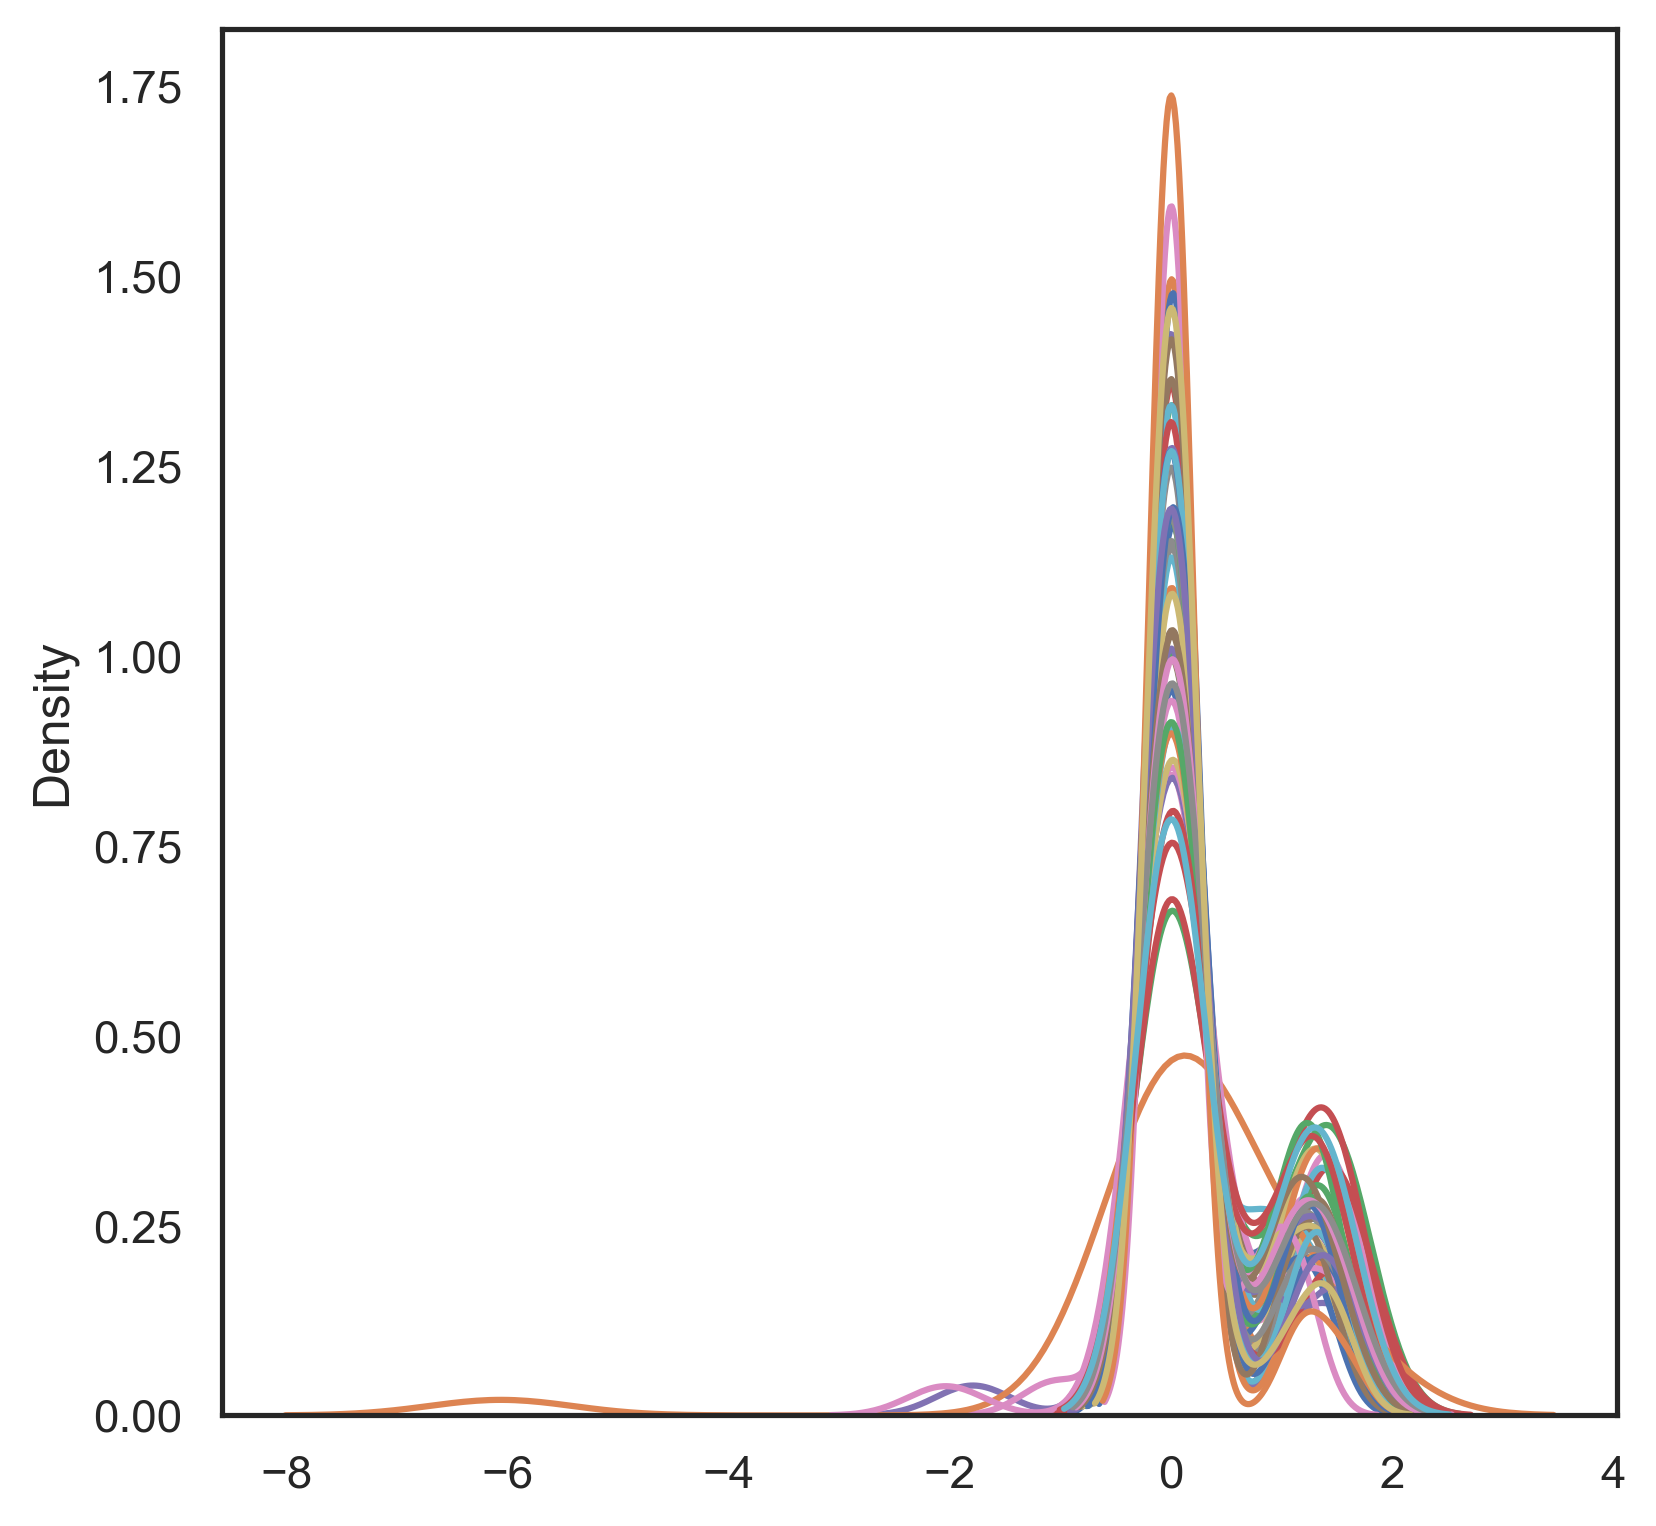

In [63]:
species = 6
alpha = np.empty(warray.shape)
beta = np.empty(warray.shape)
for i, _ in enumerate(warray):
    afd = Cw[i][species]
    afd[afd<1e-8] = 1
    # if np.var(afd) != 0:
    # fit_alpha, fit_loc, fit_beta=stats.gamma.fit(np.log10(afd))
    #     alpha[i] = fit_alpha
    #     beta[i] = fit_beta 
    # else:
    #     alpha[i] = 0
    #     beta[i] = 0
    
    # fit_alpha, fit_loc, fit_beta=stats.gamma.fit(np.log10(afd))
    # alpha[i] = fit_alpha
    # beta[i] = fit_beta 
    # print(afd)
    sns.kdeplot(np.log10(afd))


In [62]:
alpha

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf])

In [36]:
alpha = np.log10(alpha)
beta = np.log10(beta)

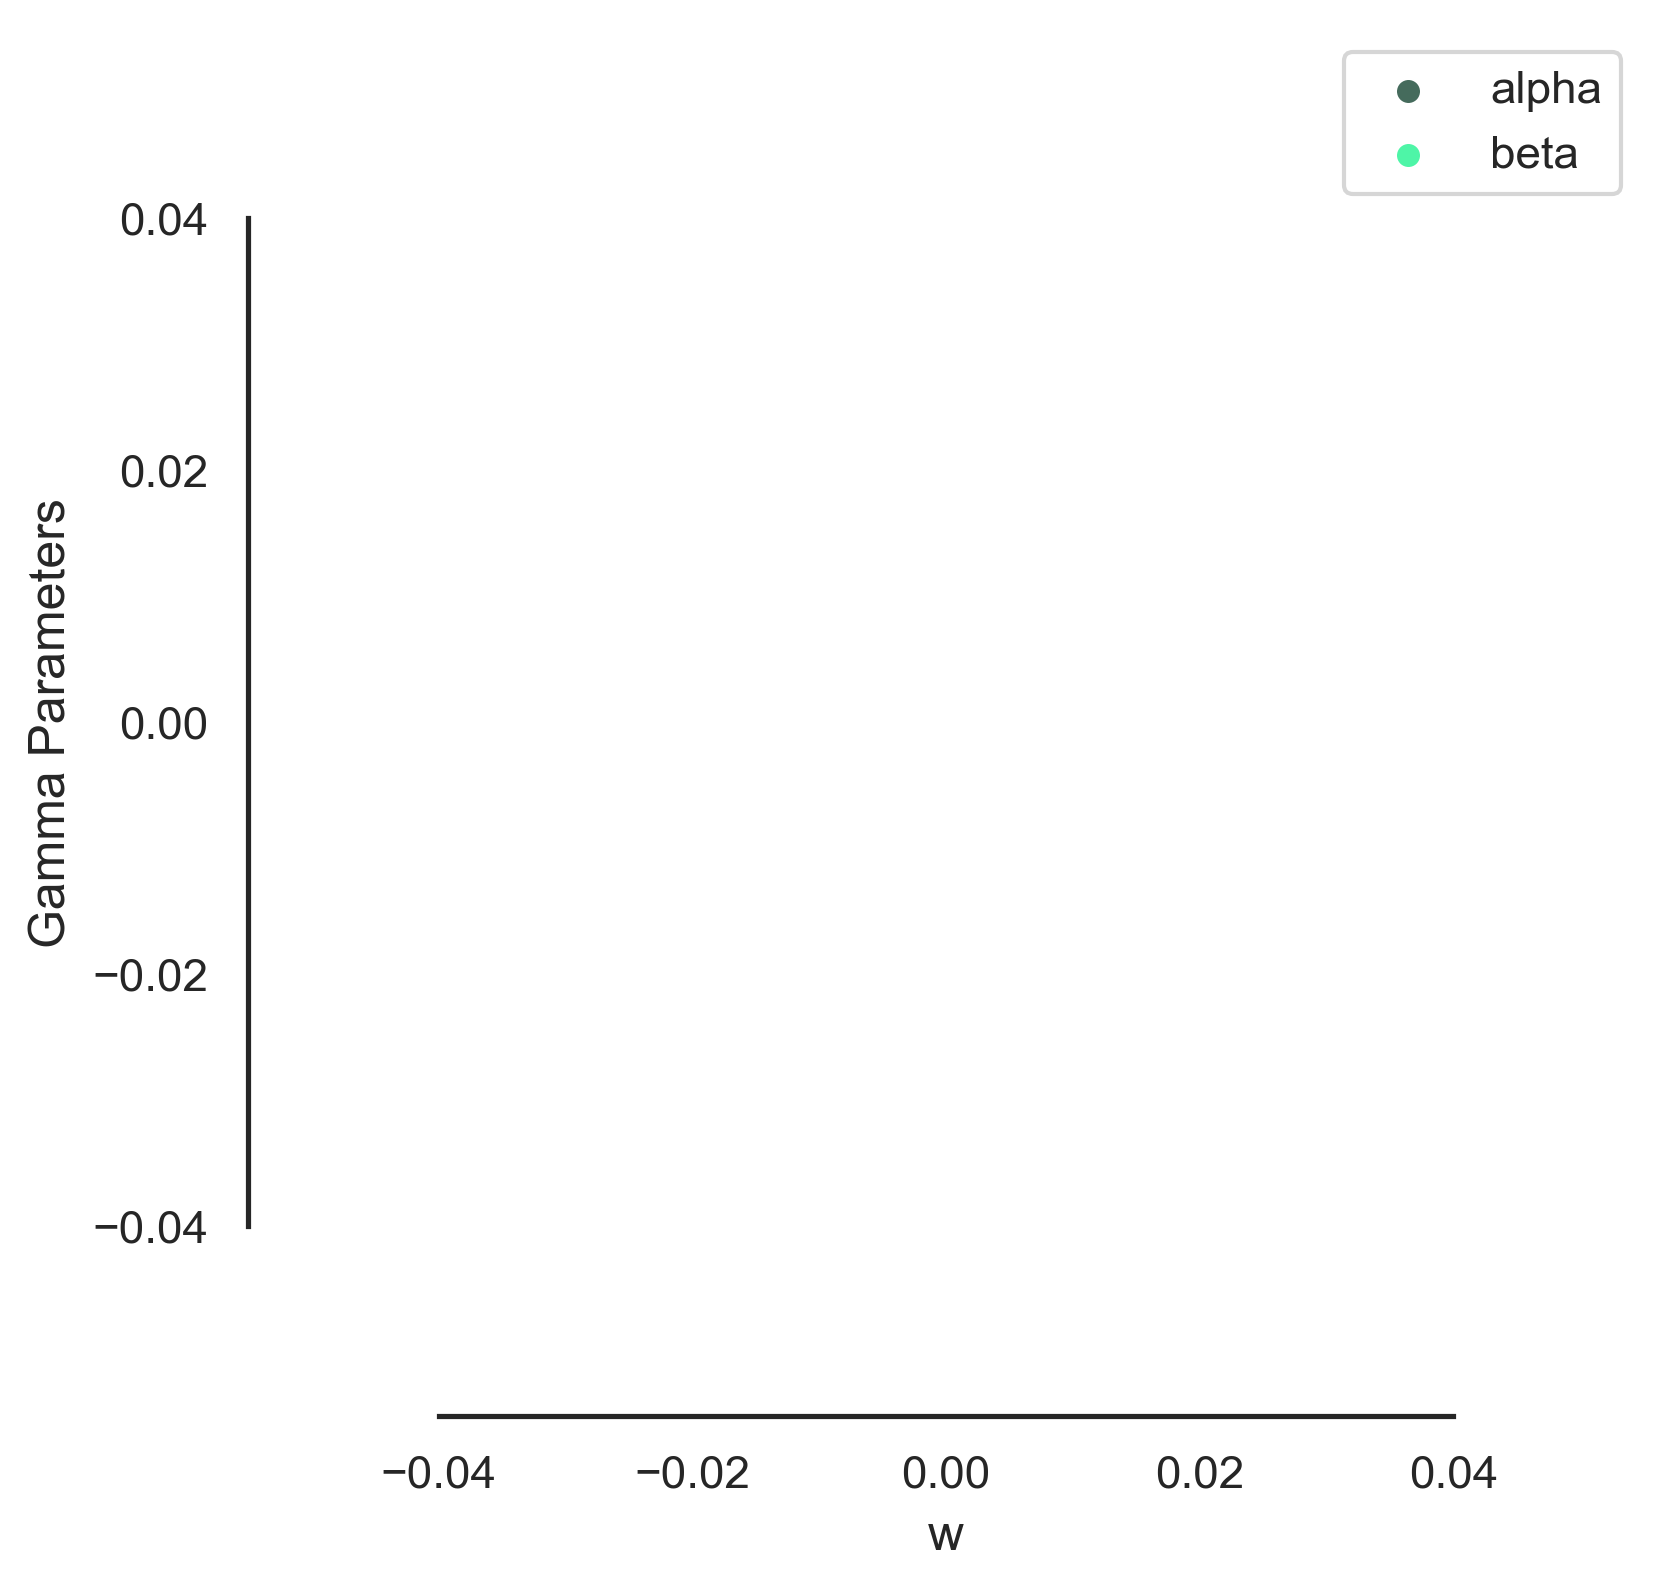

In [37]:
sns.set_theme(style='white', rc={'figure.dpi':300})
sns.scatterplot(x=warray, y=alpha, label='alpha', color='#456B5C')
sns.scatterplot(x=warray, y=beta, label='beta', color='#4ef5a7')
plt.legend()
plt.xlabel('w')
plt.ylabel('Gamma Parameters')
sns.despine(offset=.1, trim=True)

In [ ]:
stats.pearsonr(warray, alpha)


PearsonRResult(statistic=0.05511639470204105, pvalue=0.7038240253350093)

In [ ]:
stats.pearsonr(warray, beta)

PearsonRResult(statistic=0.0498902872283845, pvalue=0.7307942226694634)

# mean across-community distirbution (MAD)

In [66]:
madlist = []
madvar = []
for i, _ in enumerate(warray):
    afd = Cw[i]
    for j in range(30):
        afd[:, j] = (afd[:, j]/np.sum(afd[:, j]))*100
    mad = np.sum(afd, axis=1)/30
    mv = np.var(afd, axis=1)
    mad[mad==0] = 1
    mad[mad<1e-4] =1
    madvar.append(mv)
    madlist.append(mad)

In [67]:
afd.shape

(20, 30)

Text(0.5, 0, 'w')

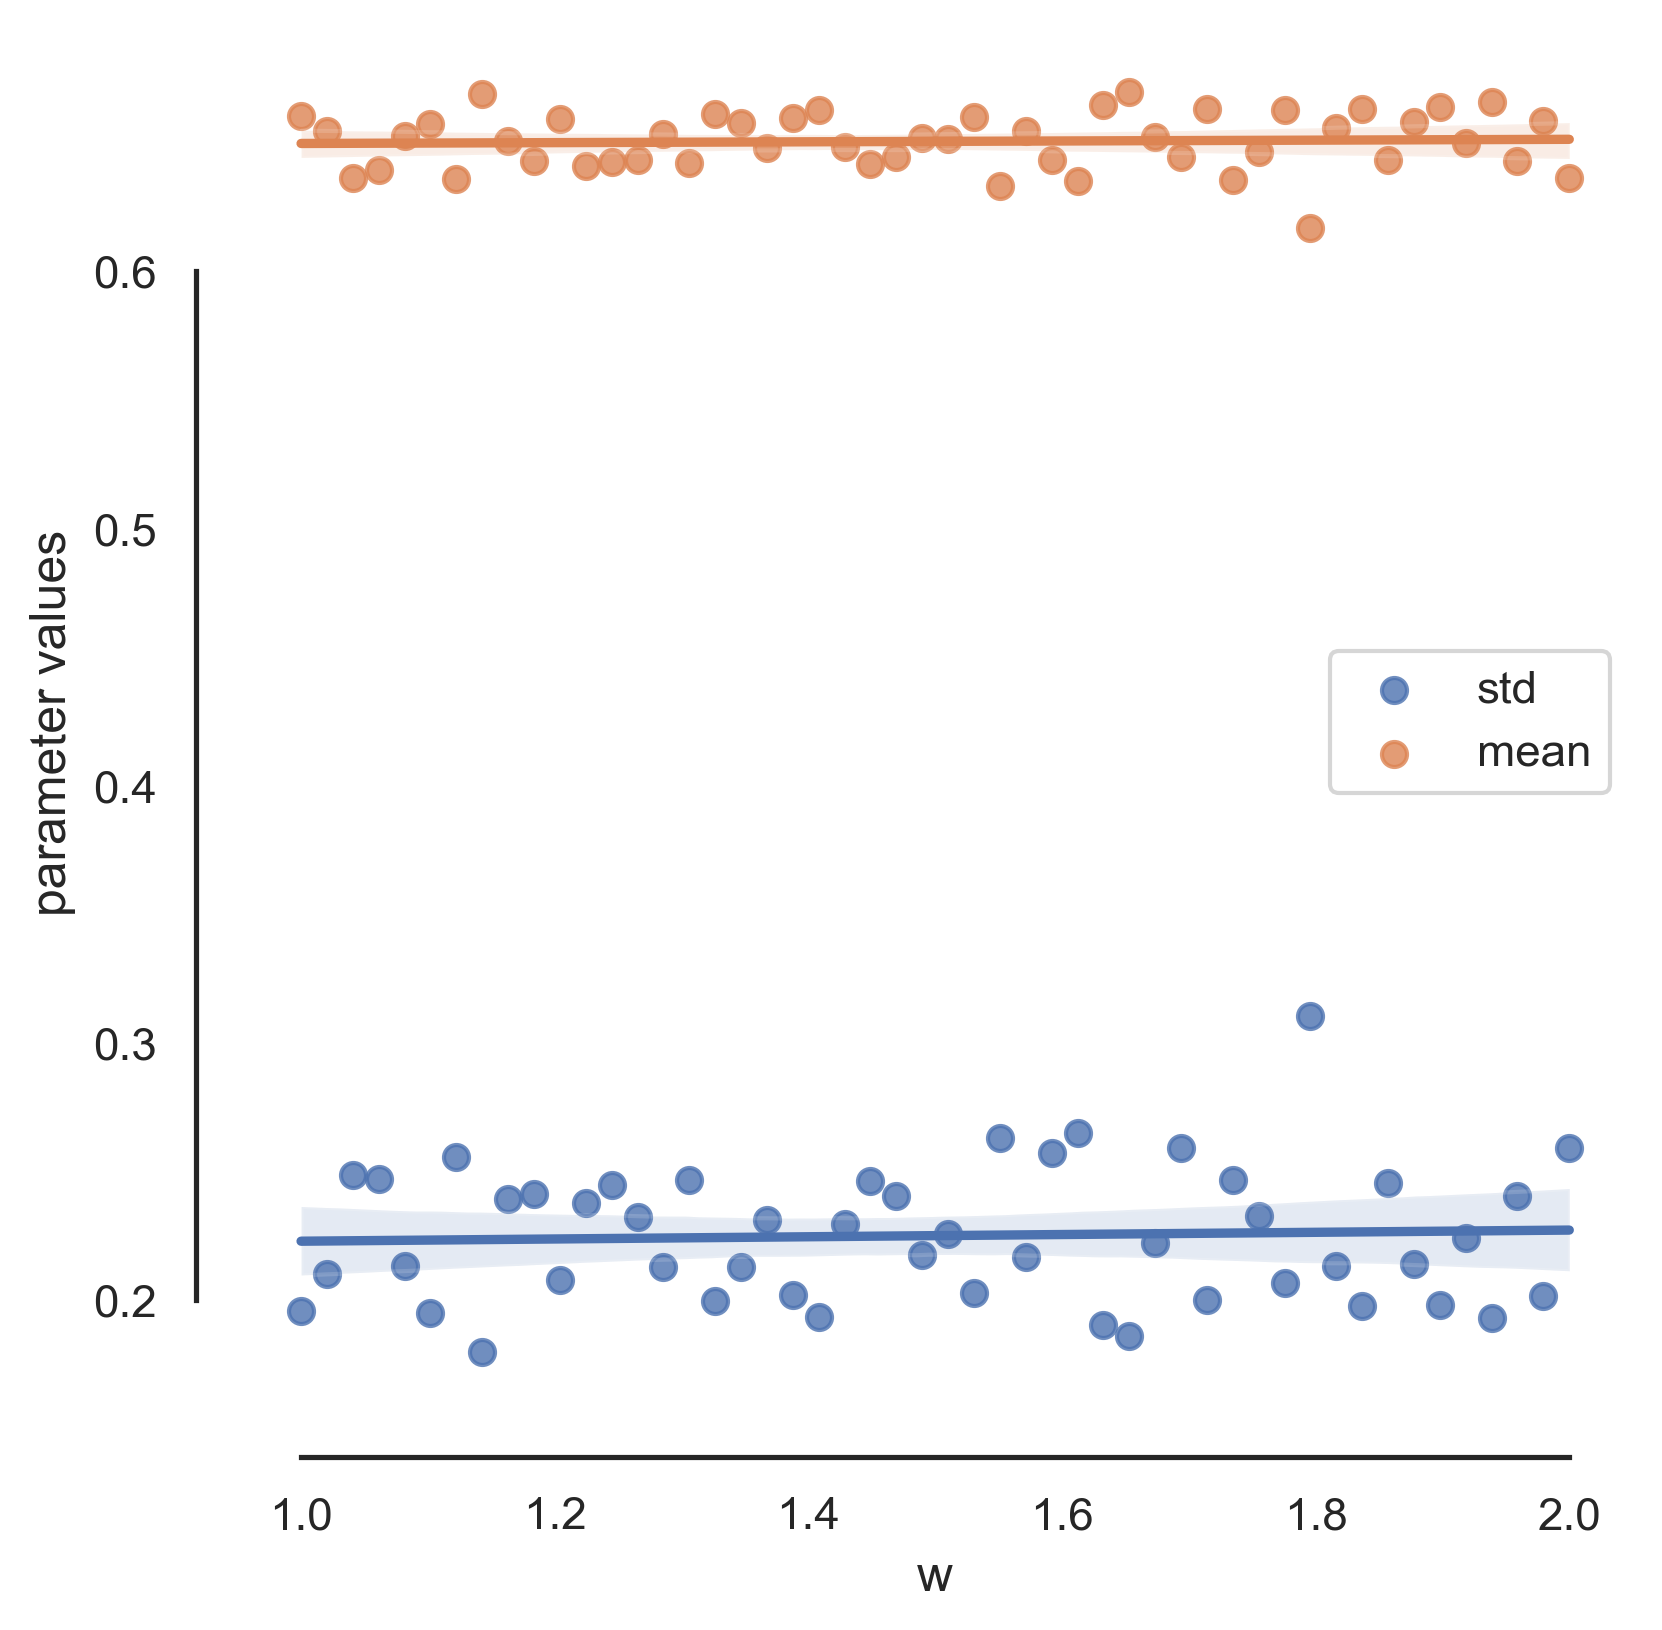

In [68]:
stdl = []
mul = []
for i in range(len(madlist)):
    mad = madlist[i]
    mu, std = stats.norm.fit(np.log10(mad), method='mle')
    stdl.append(std)
    mul.append(mu)
    # sns.distplot(np.log10(mad), fit=norm, kde=False)

sns.regplot(x=warray, y=stdl, label='std')
sns.regplot(x=warray, y=mul, label='mean')
plt.legend()
sns.despine(trim=True, offset=10)
plt.ylabel('parameter values')
plt.xlabel('w')

In [69]:
mv.shape

(20,)

In [70]:
from sklearn.linear_model import LinearRegression

In [71]:
cof = []
for i in range(len(madlist)):
    mad = madlist[i]
    mv = madvar[i]
    model = LinearRegression()
    model.fit(mad.reshape((20, 1)), mv.reshape((20,)))
    cof.append(model.coef_[0])

<Axes: >

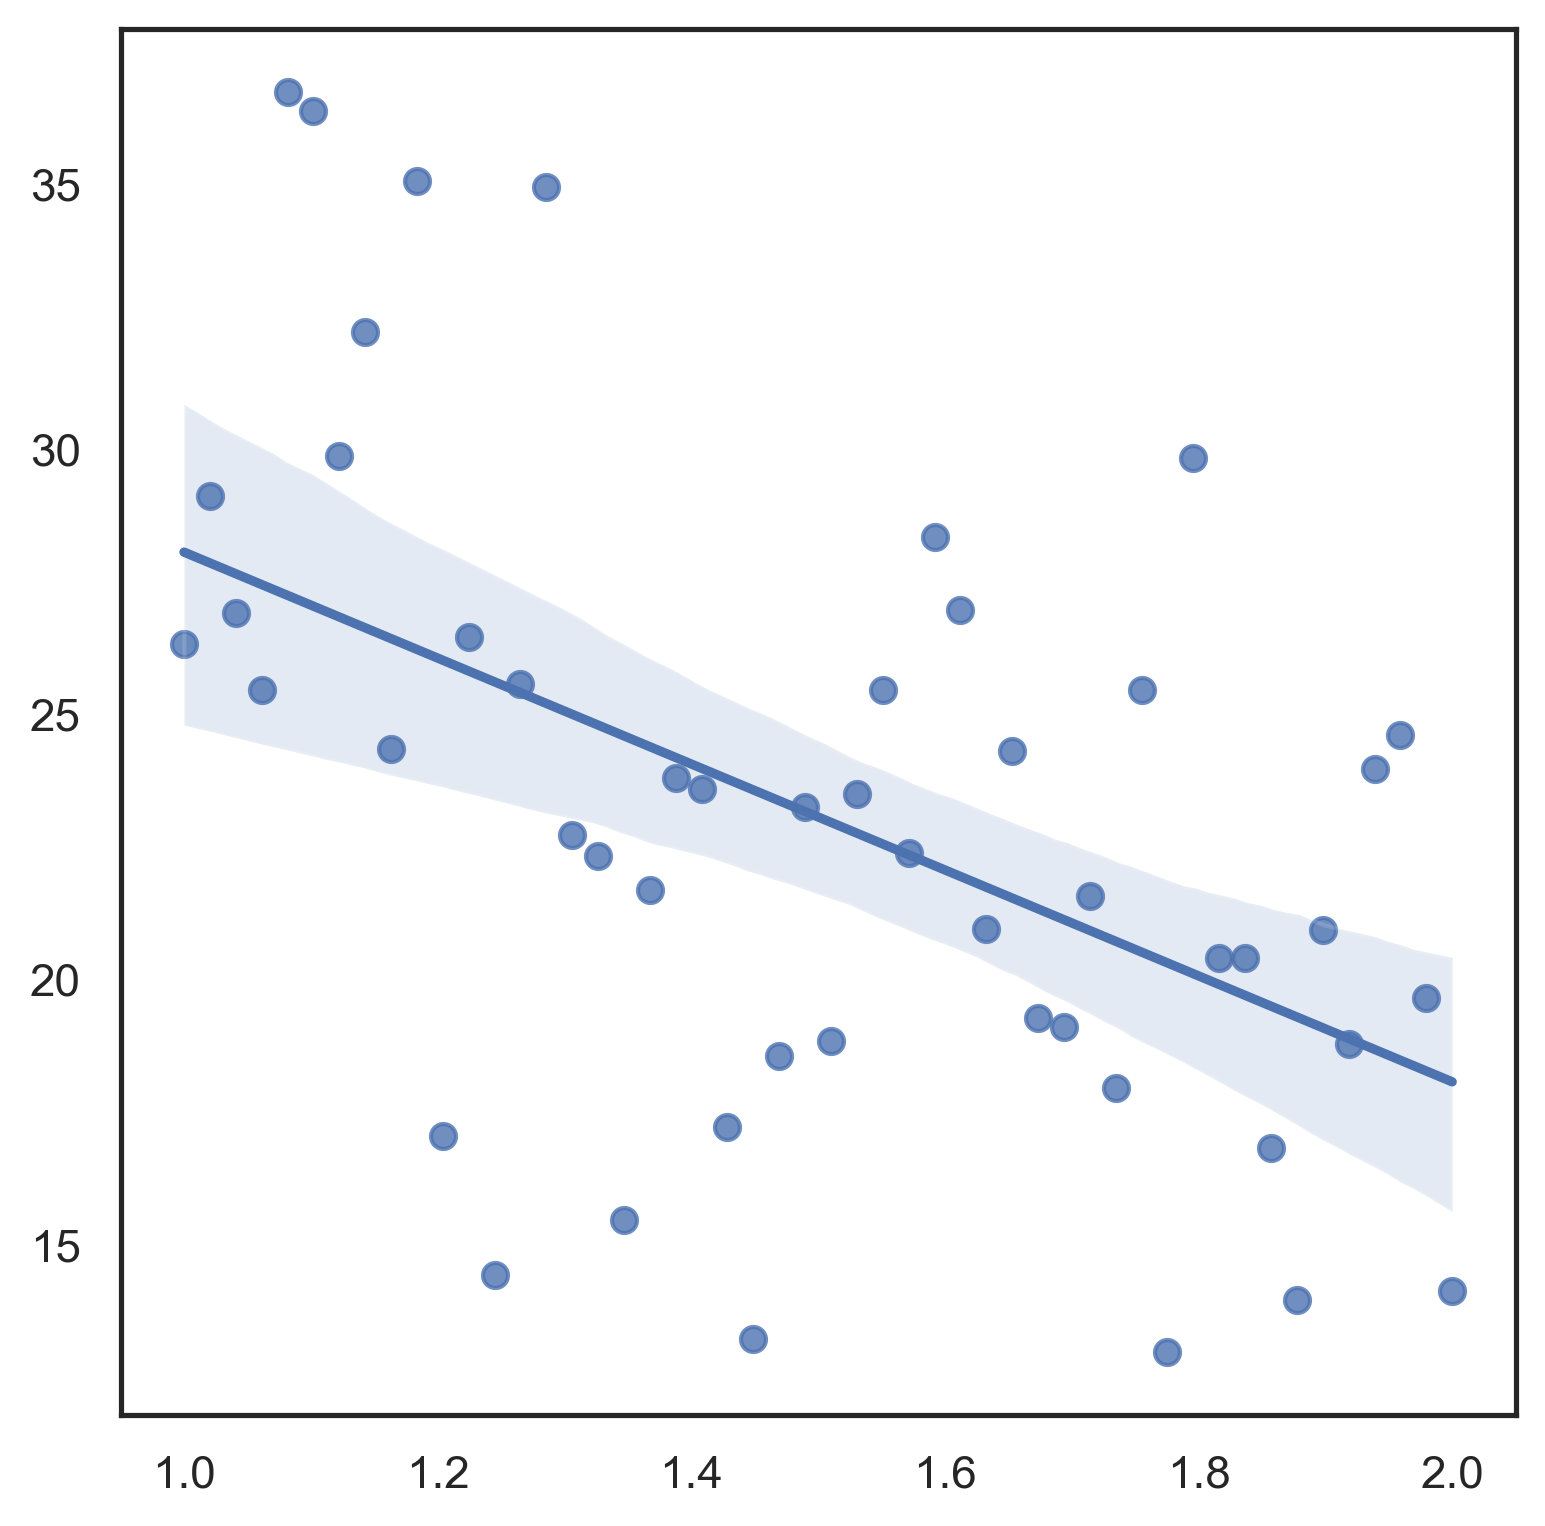

In [83]:
sns.regplot(x=warray, y=cof)

# Examples generation

In [ ]:
N, M = 5, 5
example_model = Paras(N, M)
preference, _ = int_preferences(N, M, para.mu, 0)

In [ ]:
preference

array([[0.33177089, 0.        , 0.        , 0.33420023, 0.33402888],
       [0.24976047, 0.24907833, 0.        , 0.25150539, 0.24965582],
       [0.33335591, 0.        , 0.33618446, 0.33045962, 0.        ],
       [0.2497331 , 0.25020061, 0.25231645, 0.24774984, 0.        ],
       [0.3340577 , 0.33373537, 0.33220693, 0.        , 0.        ]])

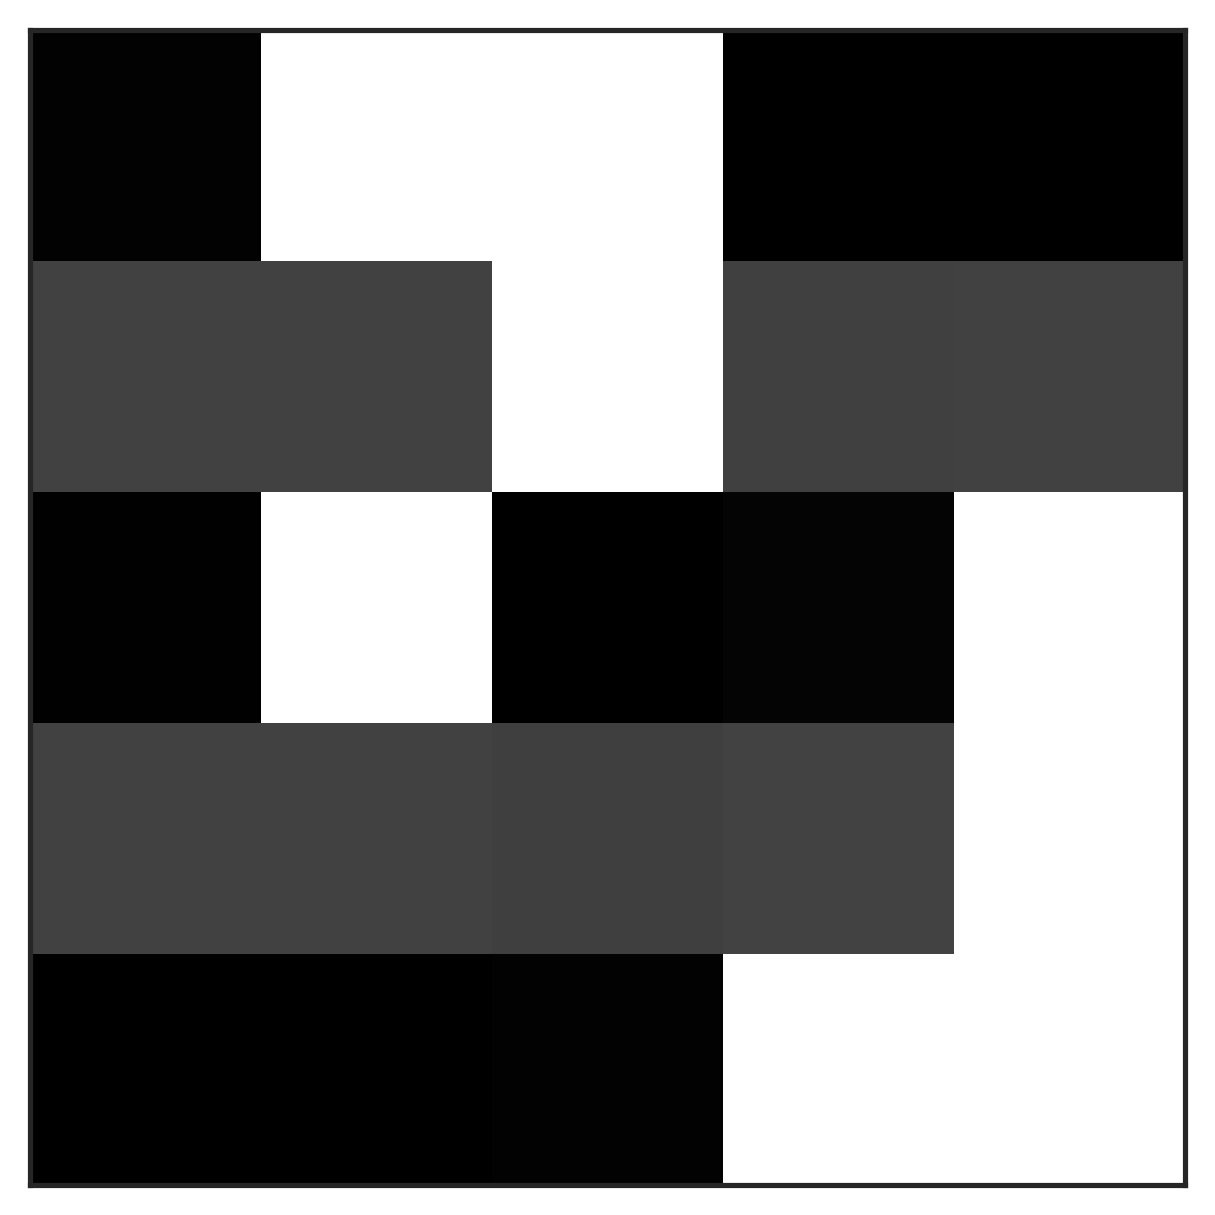

In [ ]:
Xlabel = ''
Ylabel = ''
fig = plt.figure(figsize=(5, 5), dpi=300)
ax = fig.add_subplot(111)
im = plt.imshow(preference, cmap = 'binary')
ax = plt.gca()
# ax.set_xticks(np.arange(-.5,5,1), minor = True)
# ax.set_yticks(np.arange(-.5,5,1), minor = True)
plt.xticks([])
plt.yticks([])
ax.grid(which = 'minor', color = 'k', linestyle='-', linewidth=1)
plt.title( "" )
plt.show()

In [ ]:
wl = [1, 1.2, 1.4, 1.6, 1.8, 2.0]
pdfl = [np.random.beta(1, val, 1000000) for val in wl]

In [ ]:
pdf1

Text(0.5, 0, '$ \\log_{10} m_i $')

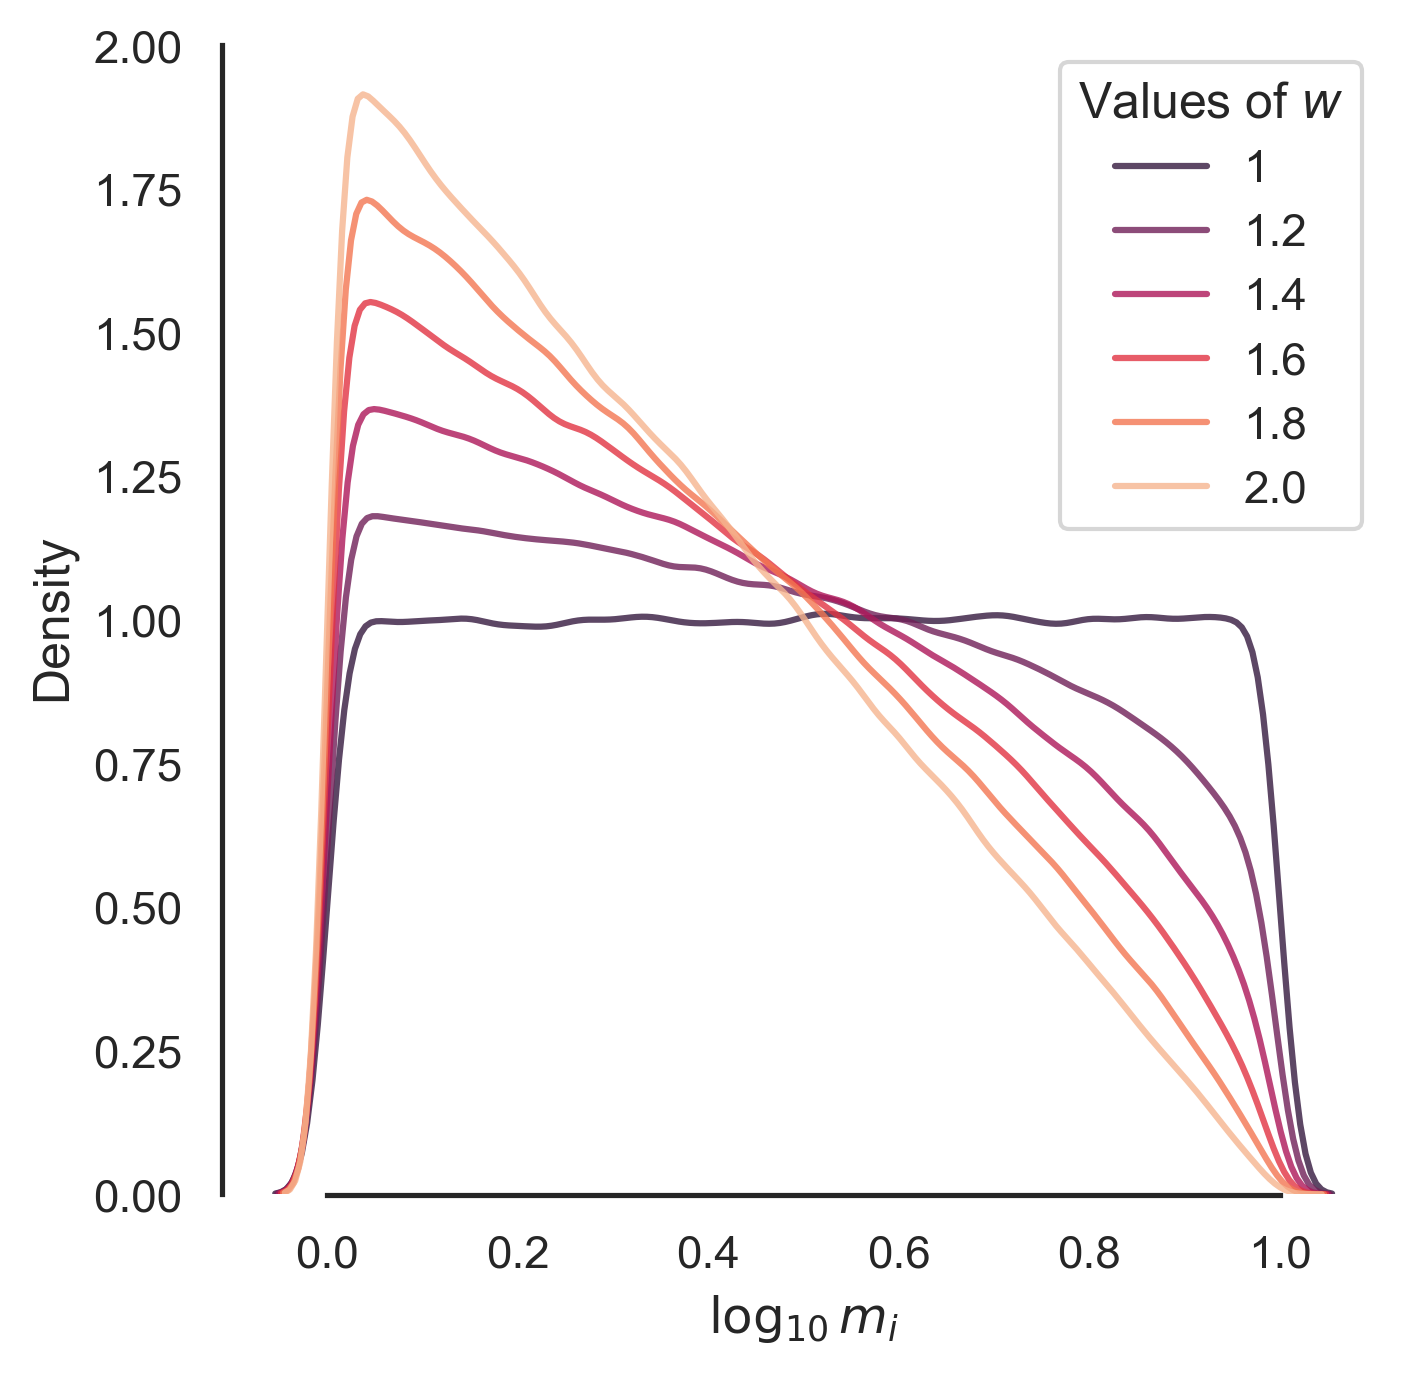

In [ ]:
fig = plt.figure(figsize=(5, 5), dpi=300)
fill_color = sns.color_palette("rocket")[0:6]
for i, pdf in enumerate(pdfl):
    sns.kdeplot(pdf, label=f'{wl[i]}', color=fill_color[i], alpha=0.8)

plt.legend(title='Values of $w$')
sns.despine(offset=0.1, trim=True)
plt.xlabel('$ \log_{10} m_i $')